<style>
#notebook-container {
    padding: 15px;
    background-color: #fff;
    min-height: 0;
    -webkit-box-shadow: 0px 0px 0px 0px rgba(87, 87, 87, 0.2);
    box-shadow: 0px 0px 0px 0px rgba(87, 87, 87, 0.2);
</style>

vers. 1.0.0

<a href="../economy/index.html">На главную страницу</a>

In [1]:
from IPython.display import HTML

HTML('''
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>
''')

# Анализ крупнейших компаний России по выручке

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')


<a href="../economy/company_list_m.html">Подробное описание набора данных</a>
<pre>
Столбцы таблицы:
- <b>industry</b> - отрасль
- <b>forg</b>     - иностранная компания 
- <b>state</b>    - компания с госучастием
</pre>

In [3]:
# Загрузка и первичная фильтрация данных
print('Набор данных о выручке ключевых компаний РФ, (млрд. руб.)')
df = pd.read_excel('./../data/data.xlsx')
df = df.drop(['city', 'p2013', 'p2014', 'p2015', 'p2016', 'p2017', 
             'i2013', 'i2014', 'i2015', 'i2016', 'i2017', 'v'], axis=1)
df['sum_year'] = df[['v2013', 'v2014', 'v2015', 'v2016', 'v2017']].sum(axis=1).astype(int)
df['cum_year'] = df['sum_year'].cumsum()

df.head(5)

Набор данных о выручке ключевых компаний РФ, (млрд. руб.)


,name,industry,v2013,v2014,v2015,v2016,v2017,forg,country,state,sum_year,cum_year
0,Газпром,Нефть и газ,5119.0,5477.0,6073.0,6111,6546,0,Россия,1,29326,29326
1,ЛУКОЙЛ,Нефть и газ,3794.0,4697.0,5174.0,4744,5475,0,Россия,0,23884,53210
2,Роснефть,Нефть и газ,3176.0,3681.0,4120.0,4134,5030,0,Россия,1,20141,73351
3,Сбербанк России,Финансы,1763.0,2234.0,2911.0,3059,3133,0,Россия,1,13100,86451
4,Российские железные дороги,Транспорт,1774.0,1796.0,1991.0,2133,2252,0,Россия,1,9946,96397


Первые 5 компаний в списке.

In [4]:
v = {'2013': df.v2013.sum().astype(int), 
     '2014': df.v2014.sum().astype(int), 
     '2015': df.v2015.sum().astype(int),
     '2016': df.v2016.sum().astype(int),
     '2017': df.v2017.sum().astype(int)}

vvp = {'2013': 73133,
       '2014': 79199, 
       '2015': 83101, 
       '2016': 86010,
       '2017': 92089
      }

comp = {'2013': df.v2013.isnull().value_counts()[0],
        '2014': df.v2014.isnull().value_counts()[0],
        '2015': df.v2015.isnull().value_counts()[0],
        '2016': df.v2016.isnull().value_counts()[0],
        '2017': df.v2017.isnull().value_counts()[0]}

comp_len = {'2013': len(df.v2013),
            '2014': len(df.v2014),
            '2015': len(df.v2015),
            '2016': len(df.v2016),
            '2017': len(df.v2017)}

## Обобщенные показатели

ВВП по данным Росстата в текущих ценах: <a href="http://www.gks.ru/free_doc/new_site/vvp/vvp-god/tab1a.xls">ссылка</a>

<pre>
Столбцы таблицы:
- <b>GDP</b>       - ВВП
- <b>company</b>   - суммарная выручка компаний 
- <b>delta</b>     - разность между ВВП и суммарной выручкой компаний (ВВП - company)
- <b>perc_comp</b> - процент 
- <b>perc_all</b>  - процент
- <b>comp</b>      - количество компаний в спике
- <b>data</b>      - данные в наличии
- <b>ndata</b>     - нет данных для текущего года
</pre>

Выручка отдельных компаний складывается по годам и отображена с столбце <b><samp>company</samp></b>. В столбце <b><samp>delta</samp></b> указана разность, между величиной ВВП и суммарной выручкой компаний набора данных. В столбце <b><samp>perc_comp</samp></b> отражается процентное отношение выручки к ВВП. В столбце <b><samp>perc_all</samp></b> отражается процентное отношение величины <b><samp>delta</samp></b> к ВВП.

In [5]:
print('Данные приводятся в млрд. рублей.')
dfv = pd.DataFrame([vvp, v, comp_len, comp], index=['GDP', 'company', 'comp', 'data']).T

dfv = dfv.sort_index(ascending=False)
dfv['delta'] = dfv.GDP - dfv.company
dfv['perc_comp'] = (dfv.company * 100 / dfv.GDP).round(1)
dfv['ndata'] = dfv.comp - dfv.data
dfv['perc_all'] = 100 - dfv.perc_comp

dfv = dfv[['GDP', 'company', 'delta', 'perc_comp', 'perc_all', 'comp', 'data', 'ndata']]

dfv

Данные приводятся в млрд. рублей.


,GDP,company,delta,perc_comp,perc_all,comp,data,ndata
2017,92089,82452,9637,89.5,10.5,661,661,0
2016,86010,75103,10907,87.3,12.7,661,661,0
2015,83101,70262,12839,84.6,15.4,661,659,2
2014,79199,61493,17706,77.6,22.4,661,641,20
2013,73133,53516,19617,73.2,26.8,661,625,36


In [6]:
print('Данные приводятся в трлн. рублей.')
dft = dfv.copy()
dft['GDP'] = (dft['GDP']/1000).round(2)
dft['company'] = (dft['company']/1000).round(2)
dft['delta'] = (dft['delta']/1000).round(2)
dft

Данные приводятся в трлн. рублей.


,GDP,company,delta,perc_comp,perc_all,comp,data,ndata
2017,92.09,82.45,9.64,89.5,10.5,661,661,0
2016,86.01,75.10,10.91,87.3,12.7,661,661,0
2015,83.10,70.26,12.84,84.6,15.4,661,659,2
2014,79.20,61.49,17.71,77.6,22.4,661,641,20
2013,73.13,53.52,19.62,73.2,26.8,661,625,36


График ВВП и суммарной выручки крупнейших компаний по годам. Выручка компаний и ВВП указаны в текущих ценах, в млрд. рублей.

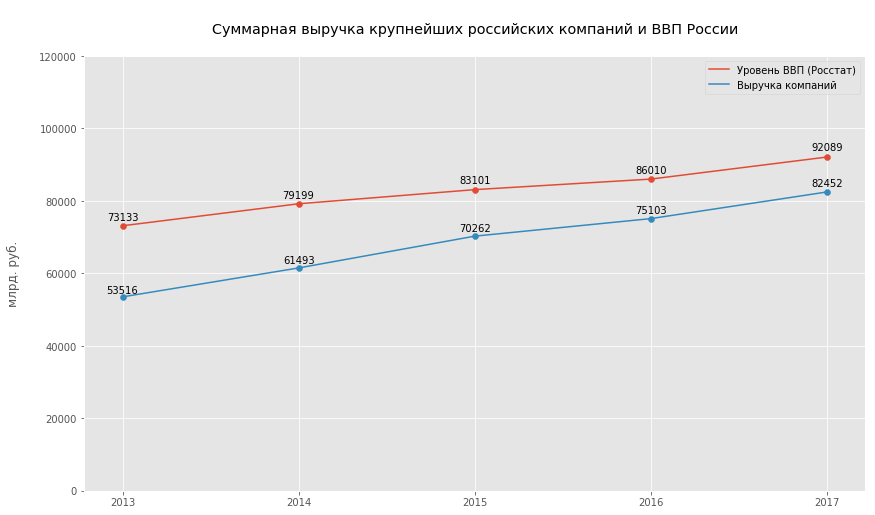

In [7]:
plt.figure(figsize=(14, 8))

plt.title('\nСуммарная выручка крупнейших российских компаний и ВВП России\n')

plt.plot(vvp.keys(), vvp.values(), label='Уровень ВВП (Росстат)')
plt.plot(v.keys(), v.values(), label='Выручка компаний')
plt.scatter(vvp.keys(), vvp.values())
plt.scatter(v.keys(), v.values())

dct = dfv.GDP.to_dict()

for i, l in dct.items():
    plt.text(i, l + l*0.02, l, horizontalalignment='center')

dct_1 = dfv.company.to_dict()

for i, l in dct_1.items():
    plt.text(i, l + l*0.02, l, horizontalalignment='center')    

plt.ylabel('млрд. руб.\n')
plt.ylim(0,120000)
plt.legend()
plt.show()

In [8]:
print('Выручка по годам: \n')
print('2013:  {} млрд. руб.  {} трлн. руб.'.format(dfv.company[4], dft.company[4].round(1)))
print('2014:  {} млрд. руб   {} трлн. руб.'.format(dfv.company[3], dft.company[3].round(1)))
print('2015:  {} млрд. руб.  {} трлн. руб.'.format(dfv.company[2], dft.company[2].round(1)))
print('2016:  {} млрд. руб.  {} трлн. руб.'.format(dfv.company[1], dft.company[1].round(1)))
print('2017:  {} млрд. руб.  {} трлн. руб.'.format(dfv.company[0], dft.company[0].round(1)))

Выручка по годам: 

2013:  53516 млрд. руб.  53.5 трлн. руб.
2014:  61493 млрд. руб   61.5 трлн. руб.
2015:  70262 млрд. руб.  70.3 трлн. руб.
2016:  75103 млрд. руб.  75.1 трлн. руб.
2017:  82452 млрд. руб.  82.4 трлн. руб.


Соотношение выручки крупнейших компаний России и ВВП России.

Высота столбца, соответствует размеру ВВП для текущего года.   

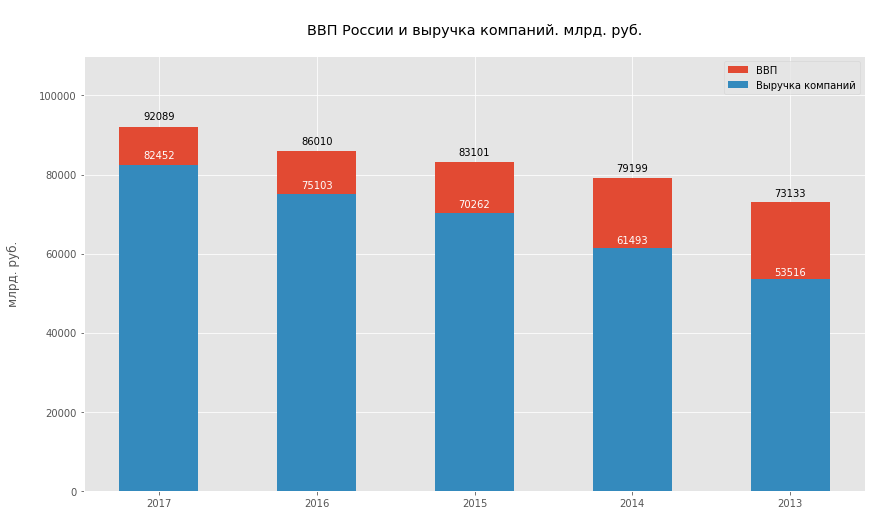

In [9]:
plt.figure(figsize=(14, 8))

plt.title('\nВВП России и выручка компаний. млрд. руб.\n')
plt.bar(dfv.index, dfv.GDP, width=0.5, label='ВВП')
plt.bar(dfv.index, dfv.company, width=0.5, label='Выручка компаний')

for i, l in dct.items():
    plt.text(i, l + l*0.02, l, horizontalalignment='center')

for i, l in dct_1.items():
    plt.text(i, l + l*0.02, l, horizontalalignment='center', color='w')

plt.ylabel('млрд. руб.\n')
plt.ylim(0,110000)
plt.legend()
plt.show()

## Выручка компаний

По горизонтальной оси, расположены индексы компаний в ранжированном списке. От 0 до n компаний в списке.

Компании упорядочены (ранжированы) по величине выручки за 2017 год в порядке убывания от большей, к меньшей. По вертикальной оси, отражена величина выручки компании.

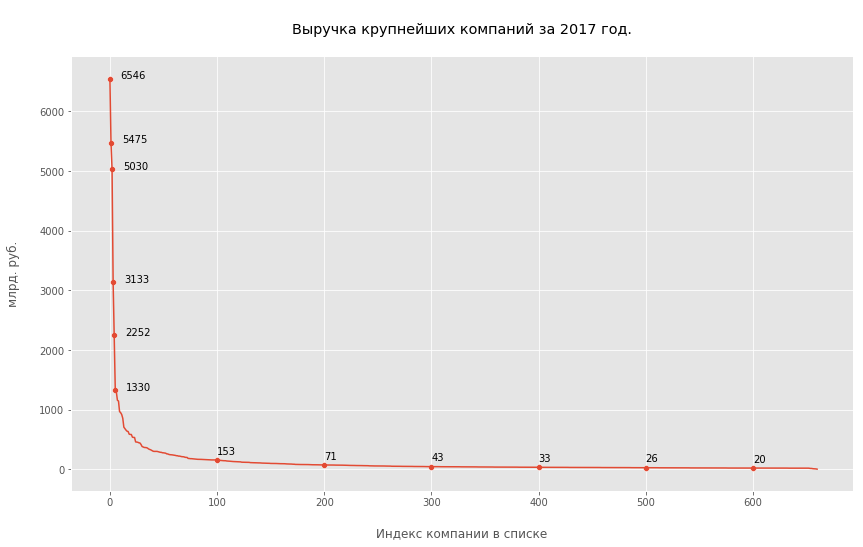

In [10]:
plt.figure(figsize=(14, 8))

color = '#e24a33'

plt.title('\nВыручка крупнейших компаний за 2017 год.\n')
plt.plot(df.index, df.v2017, color=color)

for i in range(0, 6):
    plt.scatter(df.index[i], df.v2017[i], color=color, edgecolors='w')
    plt.text(df.index[i]+10, df.v2017[i], df.v2017[i])

for i in range(100, 700, 100):
    plt.scatter(df.index[i], df.v2017[i], color=color, edgecolors='w')
    plt.text(df.index[i], df.v2017[i]+100, df.v2017[i])


plt.ylabel('млрд. руб.\n')
plt.xlabel('\nИндекс компании в списке')
plt.show()

In [11]:
print('Характеристики выборки компаний по выручке за 2017 год: \n')
print('Количество компаний в наборе данных      : {} компаний'.format(len(df.name)))
print('Суммарная выручка компаний списка        : {} млрд. руб. = {} трлн. руб.'.format(dfv.company[0], dft.company[0].round(1)))
print('Максимальная выручка компании в списке   : {} млрд. руб. = {} трлн. руб.'.format(df.v2017.max(), df.v2017.max()/1000))

Характеристики выборки компаний по выручке за 2017 год: 

Количество компаний в наборе данных      : 661 компаний
Суммарная выручка компаний списка        : 82452 млрд. руб. = 82.4 трлн. руб.
Максимальная выручка компании в списке   : 6546 млрд. руб. = 6.546 трлн. руб.


## Анализ выручки компаний списка

Для удобства, список компаний, разбит на два участка: 
- 0 - 50-й 
- 50-й до конца списка.

Выделена верхняя часть списка компаний (Топ-50 крупнейших российских компаний по выручке).

Компании упорядочены в списке по величине выручки за 2017 год. Дополнительно на график нанесены данные о выручке прошлых лет, с 2013 года включительно.

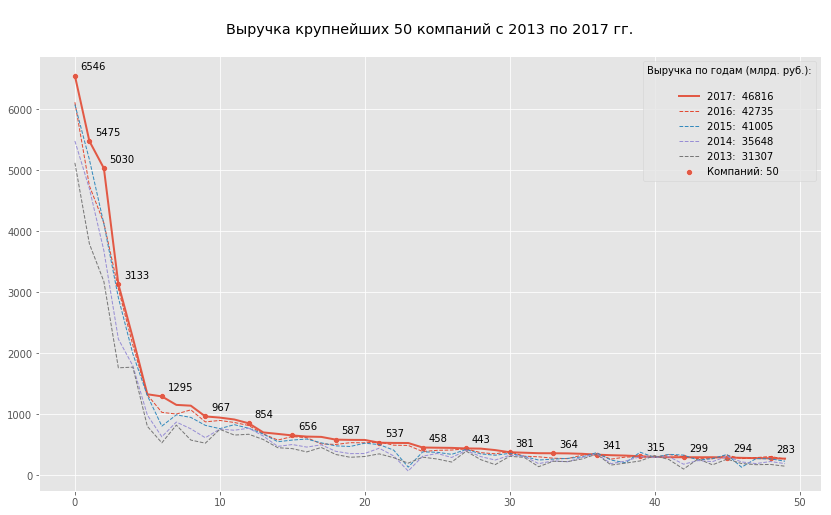

In [12]:
plt.figure(figsize=(14, 8))

n = 50

lw = 1

plt.title('\nВыручка крупнейших 50 компаний с 2013 по 2017 гг.\n')
plt.scatter(df.index[:n:3], df.v2017[:n:3], label='Компаний: {}'.format(n), color='#e25945', edgecolors='w')

plt.plot(df.index[:n], df.v2017[:n], linewidth=2, label='2017:  {} '.format(int(df.v2017[:n].sum())), color='#e25945')
plt.plot(df.index[:n], df.v2016[:n], label='2016:  {} '.format(int(df.v2016[:n].sum())), linewidth=lw, linestyle='--')
plt.plot(df.index[:n], df.v2015[:n], label='2015:  {} '.format(int(df.v2015[:n].sum())), linewidth=lw, linestyle='--')
plt.plot(df.index[:n], df.v2014[:n], label='2014:  {} '.format(int(df.v2014[:n].sum())), linewidth=lw, linestyle='--')
plt.plot(df.index[:n], df.v2013[:n], label='2013:  {} '.format(int(df.v2013[:n].sum())), linewidth=lw, linestyle='--')


dct = dict(df.v2017[:n:3])

for i, l in dct.items():
    plt.text(i+0.4, l+100, l)

plt.scatter(df.index[1], df.v2017[1], color='#e25945', edgecolors='w')
plt.text(df.index[1]+0.4, df.v2017[1]+100, df.v2017[1])

plt.scatter(df.index[2], df.v2017[2], color='#e25945', edgecolors='w')
plt.text(df.index[2]+0.4, df.v2017[2]+100, df.v2017[2])

plt.legend(title='Выручка по годам (млрд. руб.):\n')

plt.show()

In [13]:
print('Характеристика выборки крупнейших {} компаний\n'.format(n))
print('Компаний : {} \n'.format(n))
print('Выручка за: \n')
print(' - 2017 год: {} млрд. руб.  {} трлн. руб.'.format(int(df.v2017[:n].sum()), df.v2017[:n].sum()/1000))
print(' - 2016 год: {} млрд. руб.  {} трлн. руб.'.format(int(df.v2016[:n].sum()), df.v2016[:n].sum()/1000))
print(' - 2015 год: {} млрд. руб.  {} трлн. руб.'.format(int(df.v2015[:n].sum()), df.v2015[:n].sum()/1000))
print(' - 2014 год: {} млрд. руб.  {} трлн. руб.'.format(int(df.v2014[:n].sum()), df.v2014[:n].sum()/1000))
print(' - 2013 год: {} млрд. руб.  {} трлн. руб.'.format(int(df.v2013[:n].sum()), df.v2013[:n].sum()/1000))

delta_one = df.v2017[:n].sum() - df.v2013[:n].sum()

print('\nРазность 2017 - 2013: {} млрд. руб. {} трлн. руб.'.format(delta_one, delta_one/1000))
print('\nЗа 2017 год:')
print('Максимальная выручка : {} млрд. руб.  {} трлн. руб.'.format(df.v2017[:n].max(), df.v2017[:n].max()/1000))
print('Минимальная выручка  :  {} млрд. руб.  {} трлн. руб.'.format(df.v2017[:n].min(), df.v2017[:n].min()/1000))

Характеристика выборки крупнейших 50 компаний

Компаний : 50 

Выручка за: 

 - 2017 год: 46816 млрд. руб.  46.816 трлн. руб.
 - 2016 год: 42735 млрд. руб.  42.735 трлн. руб.
 - 2015 год: 41005 млрд. руб.  41.005 трлн. руб.
 - 2014 год: 35648 млрд. руб.  35.648 трлн. руб.
 - 2013 год: 31307 млрд. руб.  31.307 трлн. руб.

Разность 2017 - 2013: 15509.0 млрд. руб. 15.509 трлн. руб.

За 2017 год:
Максимальная выручка : 6546 млрд. руб.  6.546 трлн. руб.
Минимальная выручка  :  276 млрд. руб.  0.276 трлн. руб.


На графике ТОП-50 выделен коридор, между выручкой 2013 года и 2017 года. Значения выручки 2014, 2015 и 2016 годов, нанесены на график точками. 

В 2017 году компании ТОП-50 наращивают выручку по отношению к прошлым периодам.

In [14]:
df_sl = df[:50].copy()
df_sl['mean'] = df_sl[['v2013', 'v2014', 'v2015', 'v2016', 'v2017']].mean(axis=1)
df_sl['median'] = df_sl[['v2013', 'v2014', 'v2015', 'v2016', 'v2017']].median(axis=1)

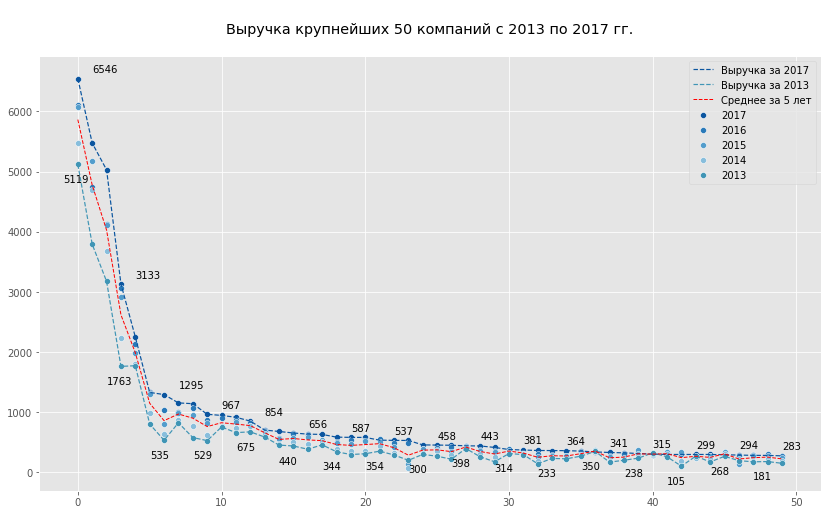

In [15]:
plt.figure(figsize=(14, 8))

n = 50

alpha =1
lw = 1

plt.title('\nВыручка крупнейших 50 компаний с 2013 по 2017 гг.\n')
plt.plot(df.index[:n], df.v2017[:n], linewidth=1.2, label='Выручка за 2017', color='#0b559f', linestyle='--')
plt.plot(df.index[:n], df.v2013[:n], linewidth=1.2, label='Выручка за 2013', color='#4095b5', linestyle='--')
plt.scatter(df.index[:n], df.v2017[:n], label='2017', edgecolor='w', color='#0b559f')

plt.scatter(df.index[:n], df.v2016[:n], label='2016', edgecolor='w', alpha=alpha, color='#2a7ab9')
plt.scatter(df.index[:n], df.v2015[:n], label='2015', edgecolor='w', alpha=alpha, color='#539dcc')
plt.scatter(df.index[:n], df.v2014[:n], label='2014', edgecolor='w', alpha=alpha, color='#88bedc')
plt.scatter(df.index[:n], df.v2013[:n], label='2013', edgecolor='w', alpha=alpha, color='#4095b5')

plt.plot(df_sl.index[:n], df_sl['mean'][:n], linewidth=1, color='red', linestyle='--', label='Среднее за 5 лет')

for i, l in df.v2017[:n:3].items():
    plt.text(i+1, l+100, l)

for i, l in df.v2013[:n:3].items():
    plt.text(i-1, l-300, int(l))

plt.legend()

plt.show()

In [16]:
one_2017 = round(df.v2017[:n].sum()/1000, 2)
two_2013 = round(df.v2013[:n].sum()/1000, 2)

print('Компании списка Топ-{}\n'.format(n))
print('Количество компаний     :  {} '.format(n))
print('Выручка за 2017 год     :  {} трлн. руб.'.format(one_2017))
print('Выручка за 2013 год     :  {} трлн. руб.'.format(two_2013))
print('Разность 2017- 2013     :  {} трлн. руб.'.format(round(one_2017 - two_2013, 2)))

print('\nСреднее за 5 лет        :  {} трлн. руб.'.format(round(df_sl['mean'].sum()/1000, 1)))
print('Медиана за 5 лет        :  {} трлн. руб.'.format(round(df_sl['median'].sum()/1000, 1)))


Компании списка Топ-50

Количество компаний     :  50 
Выручка за 2017 год     :  46.82 трлн. руб.
Выручка за 2013 год     :  31.31 трлн. руб.
Разность 2017- 2013     :  15.51 трлн. руб.

Среднее за 5 лет        :  39.5 трлн. руб.
Медиана за 5 лет        :  40.6 трлн. руб.


In [17]:
df_sl = df[:n].copy()
df_sl['mean'] = df_sl[['v2013', 'v2014', 'v2015', 'v2016', 'v2017']].mean(axis=1)
df_sl['median'] = df_sl[['v2013', 'v2014', 'v2015', 'v2016', 'v2017']].median(axis=1)

График выручки компаний списка от 50-й и до конца списка.

Линией обозначена динамика выручки компаний по результатам 2017 года. Выручка компаний, отображена в динамике за 5 лет. Выручка за прошлые годы отмечена точками. Такой способ отображения позволяет оценить разброс значений по годам.

Точки, которые расположены выше линии 2017 года, показывают большую величину выручки за прошлые годы. Таким образом, в прошлые годы, такие компании будут иметь более высокий индекс в списке.

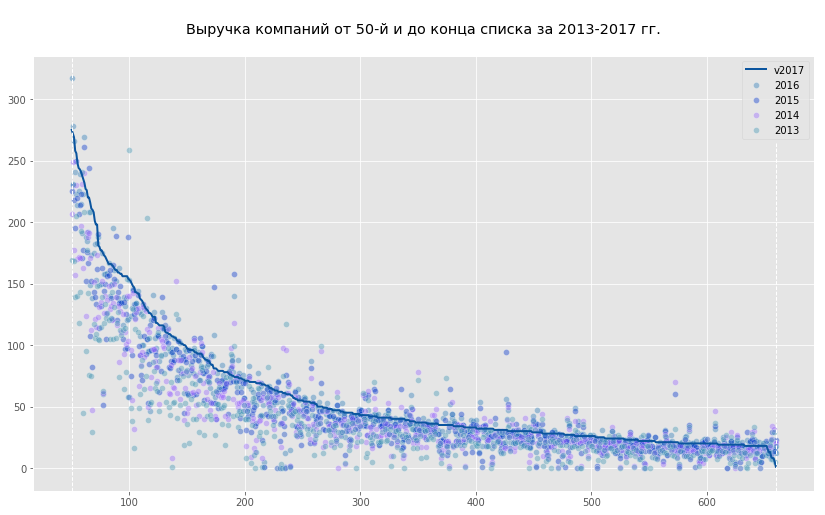

In [18]:
plt.figure(figsize=(14, 8))

n = 50
m = 661
alpha = .4

plt.title('\nВыручка компаний от 50-й и до конца списка за 2013-2017 гг.\n')
plt.plot(df.index[n:m], df.v2017[n:m], linewidth=2, color='#0b559f')

plt.scatter(df.index[n:m], df.v2016[n:m], edgecolor='w', color='#2a7ab9', label='2016', alpha=alpha)
plt.scatter(df.index[n:m], df.v2015[n:m], edgecolor='w', label='2015', color='#0033cc', alpha=alpha)
plt.scatter(df.index[n:m], df.v2014[n:m], edgecolor='w', label='2014', color='#9966ff' , alpha=alpha)
plt.scatter(df.index[n:m], df.v2013[n:m], edgecolor='w', label='2013', color='#4095b5' , alpha=alpha)

plt.axvline(df.index[n], linewidth=1, color='w', linestyle='--')
plt.axvline(df.index[-1], ymax=0.8, linewidth=1, color='w', linestyle='--')

plt.legend()
plt.show()

In [19]:
print('Количество компаний {}: \n'.format(m-n))
print('Индекс превой компании в выборке    : {} '.format(n))
print('Индекс последней компании в выборке : {} '.format(m))

print('\nВыручка компаний с {} по {} :\n'.format(n,m))
print('2017 : {}  трлн. руб. '.format((df.v2017[n:m].sum()/1000).round(2)))
print('2016 : {}  трлн. руб. '.format((df.v2016[n:m].sum()/1000).round(2)))
print('2015 : {}  трлн. руб. '.format((df.v2015[n:m].sum()/1000).round(2)))
print('2014 : {}  трлн. руб. '.format((df.v2014[n:m].sum()/1000).round(2)))
print('2013 : {}  трлн. руб. '.format((df.v2013[n:m].sum()/1000).round(2)))

Количество компаний 611: 

Индекс превой компании в выборке    : 50 
Индекс последней компании в выборке : 661 

Выручка компаний с 50 по 661 :

2017 : 35.64  трлн. руб. 
2016 : 32.37  трлн. руб. 
2015 : 29.26  трлн. руб. 
2014 : 25.85  трлн. руб. 
2013 : 22.21  трлн. руб. 


In [20]:
dct_top = {
    '10':  [df.v2017[: 10].sum()],
    '20':  [df.v2017[: 20].sum()],
    '30':  [df.v2017[: 30].sum()],
    '40':  [df.v2017[: 40].sum()],
    '50':  [df.v2017[: 50].sum()],
    '100': [df.v2017[: 100].sum()],
    '150': [df.v2017[: 150].sum()],
    '200': [df.v2017[: 200].sum()],
    '250': [df.v2017[: 250].sum()],
    '300': [df.v2017[: 300].sum()],
    '350': [df.v2017[: 350].sum()],
    '400': [df.v2017[: 400].sum()],
    '450': [df.v2017[: 450].sum()],
    '500': [df.v2017[: 500].sum()],
    '550': [df.v2017[: 550].sum()],
    '600': [df.v2017[: 600].sum()],
    '650': [df.v2017[: 650].sum()],
    'All': [df.v2017.sum()],
    'GDP': [dfv.GDP[0]]
    
}

Кумулятивная кривая (сумма наростающим итогом) для выручки компаний за 2017 год.

При сохранении порядка ранжирования по выручке за 2017 год, выполняется суммирование выручки нарастающим итогом. Это позволяет оценить пропорции участия компаний в экономике. 

Дополнительно нанесены линии уровня 100 и 50 % ВВП за 2017 год. 

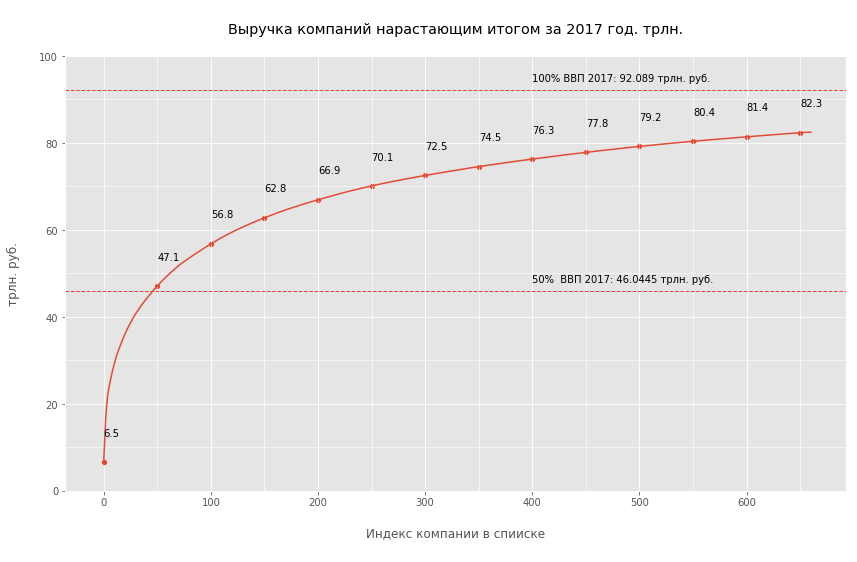

In [21]:
plt.figure(figsize=(14, 8))

plt.title('\nВыручка компаний нарастающим итогом за 2017 год. трлн.\n')

for i in range(50, 700, 50):
    plt.axvline(i, linewidth=1, color='w', alpha=0.6)
    
for i in range(10, 100, 20):
    plt.axhline(i, linewidth=1, color='w', alpha=0.6)
    
dct = round(df.v2017.cumsum()/1000, 1)
dct = dct[::50]
dct.to_dict()

for i, l in dct.items():
    plt.text(i, l+6, l)


plt.plot(df.index, df.v2017.cumsum()/1000, color='#e24a33')
plt.scatter(df.index[::50], df.v2017.cumsum()[::50]/1000, color='#e24a33', edgecolor='w')

plt.axhline(dfv.GDP[0]/1000, linestyle='--', linewidth=1)
plt.axhline(dfv.GDP[0]/1000/2, linestyle='--', linewidth=1)

plt.text(400, (dfv.GDP[0]/1000) + 2,   '100% ВВП 2017: '   + str(dfv.GDP[0]/1000) + ' трлн. руб.')
plt.text(400, (dfv.GDP[0]/1000/2) + 2, '50%  ВВП 2017: ' + str(dfv.GDP[0]/1000/2) + ' трлн. руб.')

plt.xlabel('\nИндекс компании в спииске\n')
plt.ylabel('трлн. руб.\n')
plt.ylim(0, 100)
plt.show()

In [22]:
print('Количество компаний в списке   :  {} \n'.format(len(df.name)))
print('100% ВВП за 2017 год       :  {} трлн. руб.'.format(dft.GDP[0]))
print('50%  ВВП за 2017 год       :  {} трлн. руб.\n'.format(dft.GDP[0]/2))
print('Выручка компаний за 2017 год         :  {} трлн. руб.'.format(df.v2017.sum()/1000))
print('Выручка компаний ТОП-50 за 2017 год  :  {} трлн. руб.\n'.format(df.v2017[:50].sum()/1000))


Количество компаний в списке   :  661 

100% ВВП за 2017 год       :  92.09 трлн. руб.
50%  ВВП за 2017 год       :  46.045 трлн. руб.

Выручка компаний за 2017 год         :  82.452 трлн. руб.
Выручка компаний ТОП-50 за 2017 год  :  46.816 трлн. руб.



Кумулятивная кривая выручки первых 50 компаний списка (Топ-50) в сравнении с 50% ВВП за 2017 год.


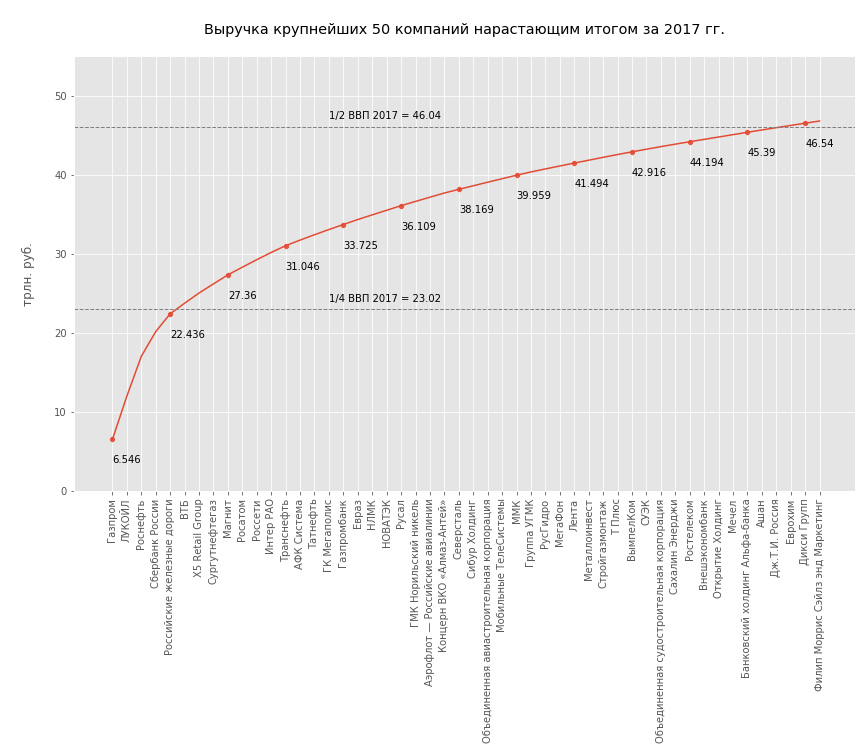

In [23]:
plt.figure(figsize=(14, 8))
plt.title('\nВыручка крупнейших 50 компаний нарастающим итогом за 2017 гг.\n')

plt.plot(df.name[:50], df.v2017[:50].cumsum()/1000)

plt.axhline(dft.GDP[0]/2, linewidth=1, linestyle='--', color='grey')
plt.axhline(dft.GDP[0]/4, linewidth=1, linestyle='--', color='grey')

plt.text(15, (dft.GDP[0]/2)+1, '1/2 ВВП 2017 = ' + str(round(dft.GDP[0]/2, 2)))
plt.text(15, (dft.GDP[0]/4)+1, '1/4 ВВП 2017 = ' + str(round(dft.GDP[0]/4, 2)))

dz = df[['name', 'v2017']].copy()
dz['cs'] = dz.v2017.cumsum()
t = dz['cs'][:50:4]

for i, l in t.items():
    plt.text(i, (l/1000)-3, l/1000)
    plt.scatter(i, l/1000, color="#e25945", edgecolor='w')

plt.ylabel('\nтрлн. руб.\n')
plt.ylim(0, 55)
plt.xticks(rotation=90)
plt.show()

Пояснения к таблице:
- <samp>GDP_2017</samp> - ВВП в 2017 году в трлн. руб.
- <samp>cum_sum</samp> - сумма выручки наростающим итогом
- <samp>pers_cumsum</samp> - процент суммы наростающим итогом к ВВП

In [24]:
print('Выручка ТОП - 50 компаний за 2017 год  :', df.v2017[:50].sum()/1000, ' трлн. руб.')
print('Выручка ТОП - 25 компаний за 2017 год  :', df.v2017[:25].sum()/1000, ' трлн. руб.')

print('\nПервые 25 компаний списка:\n')
dfk = df.copy()
dfk['cum_sum'] = dfk.v2017.cumsum()
dfk['cum_sum_tln'] = dfk.cum_sum/1000
dfk['GDP_2017'] = dft['GDP'][0]
dfk['perc_cumsum'] = round(100 / (dfk['GDP_2017']/ dfk['cum_sum_tln']))
dfk[['name', 'v2017', 'cum_sum', 'cum_sum_tln', 'GDP_2017', 'perc_cumsum']][:25]

Выручка ТОП - 50 компаний за 2017 год  : 46.816  трлн. руб.
Выручка ТОП - 25 компаний за 2017 год  : 38.169  трлн. руб.

Первые 25 компаний списка:



,name,v2017,cum_sum,cum_sum_tln,GDP_2017,perc_cumsum
0,Газпром,6546,6546,6.546,92.09,7.0
1,ЛУКОЙЛ,5475,12021,12.021,92.09,13.0
2,Роснефть,5030,17051,17.051,92.09,19.0
3,Сбербанк России,3133,20184,20.184,92.09,22.0
4,Российские железные дороги,2252,22436,22.436,92.09,24.0
5,ВТБ,1330,23766,23.766,92.09,26.0
6,X5 Retail Group,1295,25061,25.061,92.09,27.0
7,Сургутнефтегаз,1156,26217,26.217,92.09,28.0
8,Магнит,1143,27360,27.360,92.09,30.0
9,Росатом,967,28327,28.327,92.09,31.0


In [25]:
dz = df[['name', 'v2017']].copy()
dz['cs'] = dz.v2017.cumsum()

## Выборка крупнейших компаний

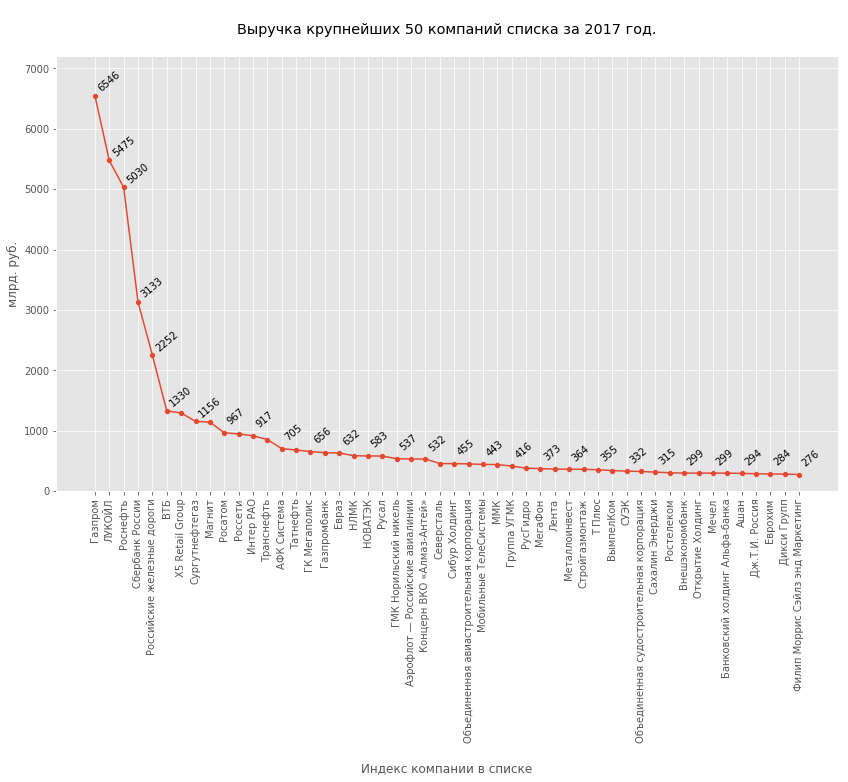

In [26]:
plt.figure(figsize=(14, 8))

n = 50

plt.title('\nВыручка крупнейших {} компаний списка за 2017 год.\n'.format(n))
plt.plot(df.name[: n], df.v2017[: n])
plt.scatter(df.name[: n], df.v2017[: n], color='#e24a33', edgecolor='w')


dct = df.v2017[5:n:2].to_dict()

for i, l in dct.items():
    plt.text(i+0.1, l +300, l, rotation=40)
    
dct = df.v2017[:5].to_dict()

for i, l in dct.items():
    plt.text(i+0.1, l +300, l, rotation=40)

plt.ylim(0, 7200)
plt.xticks(rotation=90)
plt.ylabel('млрд. руб.')
plt.xlabel('\nИндекс компании в списке')
plt.show()

In [27]:
print('Выручка компаний за 2017 год :  {}  трлн. руб.\n'.format(df.v2017[:n].sum()/1000))

Выручка компаний за 2017 год :  46.816  трлн. руб.



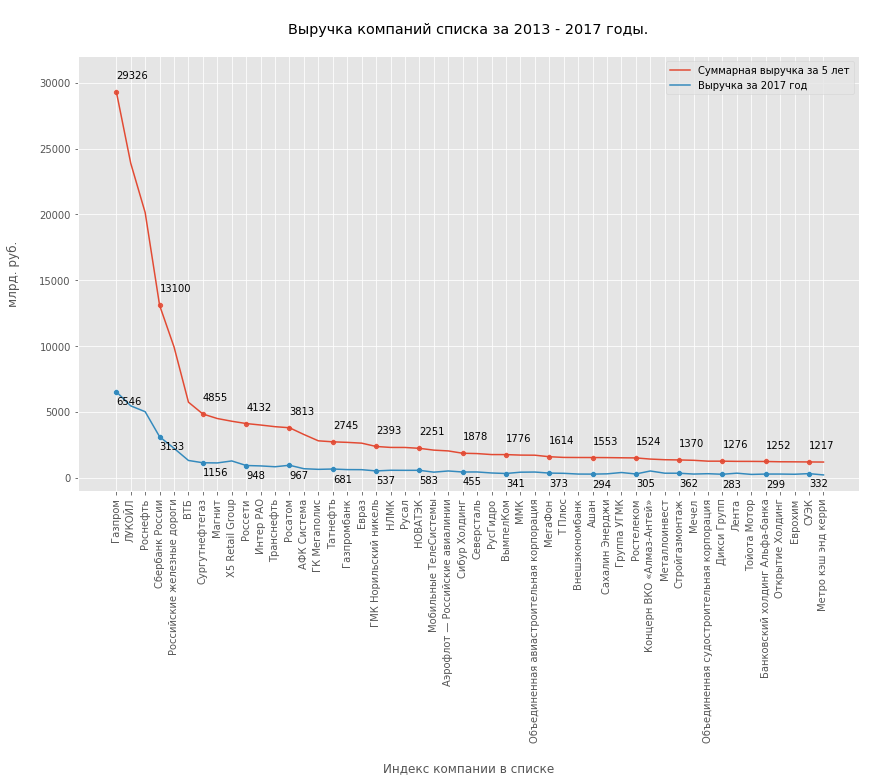

In [28]:
dfl = df.sort_values('sum_year', ascending=False)

plt.figure(figsize=(14, 8))

plt.title('\nВыручка компаний списка за 2013 - 2017 годы.\n')
plt.plot(dfl.name[: 50], dfl.sum_year[: 50], label='Суммарная выручка за 5 лет')
plt.plot(dfl.name[: 50], dfl.v2017[: 50], label='Выручка за 2017 год')


dct = dict(dfl[['name', 'sum_year']][:50:3].values)

for i, l in dct.items():
    plt.scatter(i, l, edgecolor='w', color='#e25945')
    plt.text(i, l+1000, l)



dct = dict(dfl[['name', 'v2017']][:50:3].values)

for i, l in dct.items():
    plt.scatter(i, l, color='#348abd', edgecolor='w')
    plt.text(i, l-1000, l)

plt.legend()
plt.ylim(-1000, 32000)
plt.xticks(rotation=90)
plt.ylabel('млрд. руб.\n')
plt.xlabel('\nИндекс компании в списке')
plt.show()

In [29]:
print('Сумма выручки 50 крупнейших компаний за 5 лет: {} трлн. руб.'.format(dfl.sum_year.sum()/1000))

Сумма выручки 50 крупнейших компаний за 5 лет: 342.823 трлн. руб.


In [30]:
state = df[df['state'] == True]
nstate = df[df['state'] == False]
forg = df[df['forg'] == True]

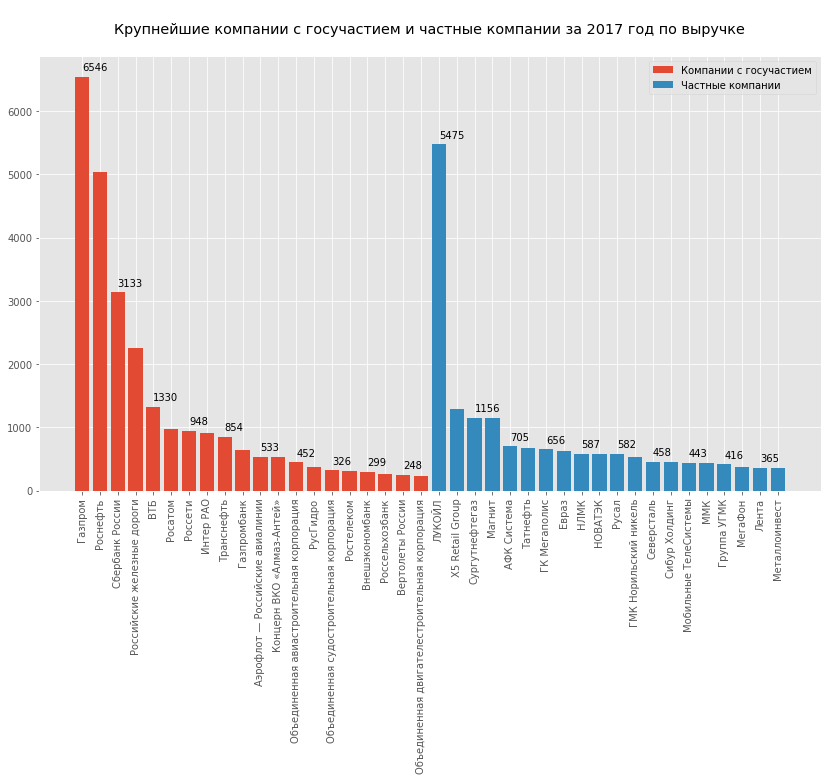

In [31]:
plt.figure(figsize=(14, 8))

n = 20

plt.title('\nКрупнейшие компании с госучастием и частные компании за 2017 год по выручке\n')
plt.bar(state.name[:n],  state.v2017[:n], label='Компании с госучастием')
plt.bar(nstate.name[:n], nstate.v2017[:n], label='Частные компании')

dct = dict(state[['name', 'v2017']][:20:2].values)

for i, l in dct.items():
    plt.text(i, l+100, l, ha='left')
    
dct = dict(nstate[['name', 'v2017']][:20:2].values)

for i, l in dct.items():
    plt.text(i, l+100, l, ha='left')

plt.legend()
plt.xticks(rotation=90)
plt.show()

In [32]:
print('Крупнейших компаний с госучастием в выборке  : {}'.format(n))
print('Крупнейших частных в выборке                 : {}\n'.format(n))

st  = state.v2017[:n].sum()/1000
nst = nstate.v2017[:n].sum()/1000
print('Выручка 2017 года:')
print('Выручка крупнейших компаний с госучастием     : {} трлн. руб.'.format(st))
print('Выручка крупнейших частных компаний           : {} трлн. руб.'.format(nst))
print('Разность государственные - частные компании   : {} трлн. руб.\n'.format(round(st - nst, 2)))
print('Суммарная выручка {} компаний                 : {} трлн. руб.'.format(n*2, st + nst))

Крупнейших компаний с госучастием в выборке  : 20
Крупнейших частных в выборке                 : 20

Выручка 2017 года:
Выручка крупнейших компаний с госучастием     : 26.194 трлн. руб.
Выручка крупнейших частных компаний           : 17.346 трлн. руб.
Разность государственные - частные компании   : 8.85 трлн. руб.

Суммарная выручка 40 компаний                 : 43.54 трлн. руб.


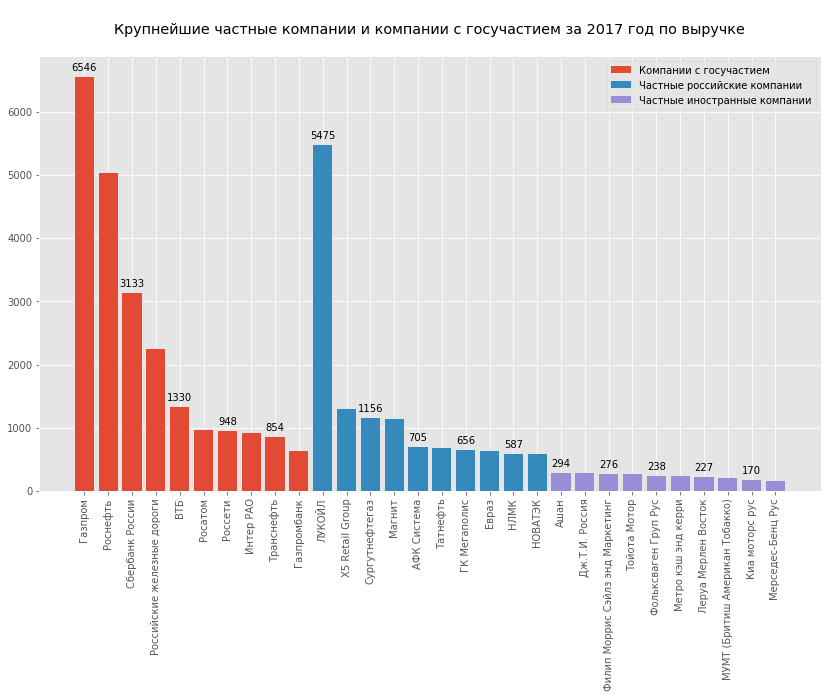

In [33]:
plt.figure(figsize=(14, 8))

n = 10


plt.title('\nКрупнейшие частные компании и компании с госучастием за 2017 год по выручке\n')
plt.bar(state.name[:n],  state.v2017[:n], label='Компании с госучастием')
plt.bar(nstate.name[:n], nstate.v2017[:n], label='Частные российские компании')
plt.bar(forg.name[:n], forg.v2017[:n], label='Частные иностранные компании')

dct = dict(state[['name', 'v2017']][:10:2].values)

for i, l in dct.items():
    plt.text(i, l+100, l, ha='center')
    
dct = dict(nstate[['name', 'v2017']][:10:2].values)

for i, l in dct.items():
    plt.text(i, l+100, l, ha='center')
    
dct = dict(forg[['name', 'v2017']][:10:2].values)

for i, l in dct.items():
    plt.text(i, l+100, l, ha='center')

plt.legend()
plt.xticks(rotation=90)
plt.show()

In [34]:
print('\nКрупнейших компаний с госучастием в выборке  : {}'.format(n))
print('Крупнейших частных компаний в выборке        : {}'.format(n))
print('Крупнейших иностранных компаний в выборке    : {}\n'.format(n))

st  = state.v2017[:n].sum()/1000
nst = nstate.v2017[:n].sum()/1000
frg = forg.v2017[:n].sum()/1000

print('Выручка 2017 года:')
print('Выручка крупнейших {} компаний с госучастием : {} трлн. руб.'.format(n, st))
print('Выручка крупнейших {} частных компаний       : {} трлн. руб.'.format(n, nst))
print('Выручка крупнейших {} иностранных компаний   : {}  трлн. руб.\n'.format(n, frg))

print('Разность государственные - частные     : {}  трлн. руб.'.format(round(st - nst, 1)))
print('Разность государственные - иностранные : {} трлн. руб.'.format(round(st - frg, 1)))
print('Разность частные - иностранные         : {} трлн. руб.\n'.format(round(nst - frg, 1)))
print('Суммарная выручка {} компаний          : {} трлн. руб.'.format(n*3, st + nst + frg))


Крупнейших компаний с госучастием в выборке  : 10
Крупнейших частных компаний в выборке        : 10
Крупнейших иностранных компаний в выборке    : 10

Выручка 2017 года:
Выручка крупнейших 10 компаний с госучастием : 22.614 трлн. руб.
Выручка крупнейших 10 частных компаний       : 12.913 трлн. руб.
Выручка крупнейших 10 иностранных компаний   : 2.365  трлн. руб.

Разность государственные - частные     : 9.7  трлн. руб.
Разность государственные - иностранные : 20.2 трлн. руб.
Разность частные - иностранные         : 10.5 трлн. руб.

Суммарная выручка 30 компаний          : 37.892 трлн. руб.


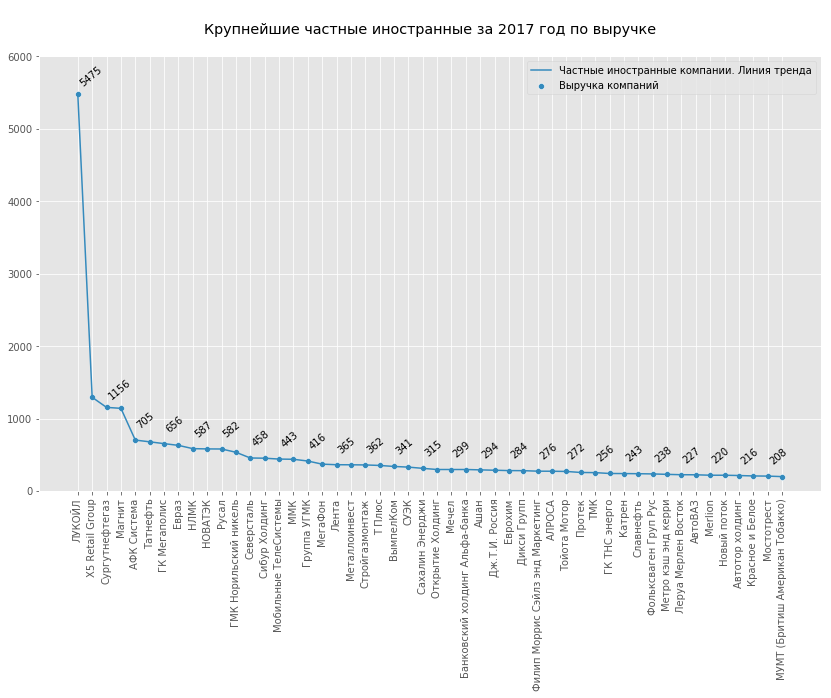

In [35]:
plt.figure(figsize=(14, 8))

n = 50

plt.title('\nКрупнейшие частные иностранные за 2017 год по выручке\n')

plt.plot(nstate.name[:n], nstate.v2017[:n], label='Частные иностранные компании. Линия тренда', color='#348abd')
plt.scatter(nstate.name[:n], nstate.v2017[:n], color='#348abd', edgecolors='w', label='Выручка компаний')

dct = dict(nstate[['name', 'v2017']][:n:2].values)

for i, l in dct.items():
    plt.text(i, l+300, l, rotation=40)

plt.ylim(0, 6000)
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [36]:
print('Количество компаний          :  {}'.format(n))
print('Выручка компаний за 2017 год :  {}  трлн. руб.\n'.format(nstate.v2017[:n].sum()/1000))
nstate[['name', 'industry', 'v2013', 'v2014', 'v2015', 'v2016', 'v2017']][:50]

Количество компаний          :  50
Выручка компаний за 2017 год :  25.361  трлн. руб.



,name,industry,v2013,v2014,v2015,v2016,v2017
1,ЛУКОЙЛ,Нефть и газ,3794.0,4697.0,5174.0,4744,5475
6,X5 Retail Group,Торговля,535.0,634.0,809.0,1034,1295
7,Сургутнефтегаз,Нефть и газ,825.0,875.0,993.0,1006,1156
8,Магнит,Торговля,580.0,764.0,951.0,1075,1143
13,АФК Система,Инвестиции,589.0,646.0,679.0,681,705
14,Татнефть,Нефть и газ,455.0,476.0,553.0,580,681
15,ГК Мегаполис,Дистрибуция,440.0,507.0,580.0,638,656
17,Евраз,Металлы и горная добыча,459.0,502.0,534.0,517,632
18,НЛМК,Металлы и горная добыча,344.0,396.0,485.0,508,587
19,НОВАТЭК,Нефть и газ,298.0,358.0,475.0,537,583


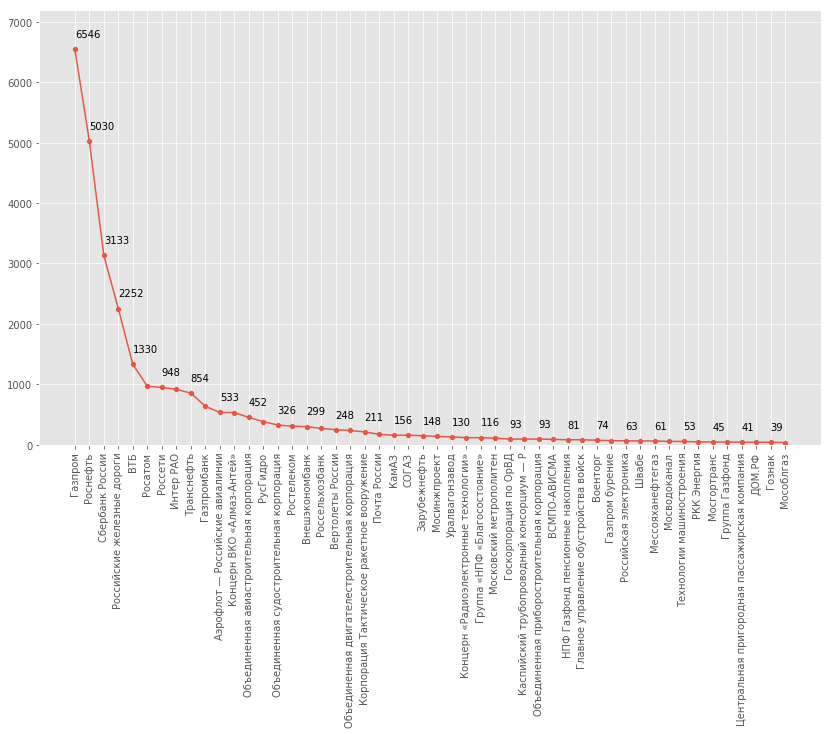

In [37]:
plt.figure(figsize=(14, 8))

n = 50

plt.scatter(state.name[:n], state.v2017[:n], color='#e25945', label='Выручка компаний с госучастием за 2017 год', edgecolors='w')
plt.plot(state.name[:n], state.v2017[:n], color='#e25945', label='Компании с госучастием')

dct = dict(state[['name', 'v2017']][:n:2].values)

for i, l in dct.items():
    plt.text(i, l+200, l)
    
plt.text(state.name[2], state.v2017[2]+200, state.v2017[2])
plt.text(state.name[4], state.v2017[4]+200, state.v2017[4])

plt.ylim(0, 7200)
plt.xticks(rotation=90)
plt.show()

In [38]:
print('Количество компаний          :  {}'.format(n))
print('Выручка компаний за 2017 год :  {}  трлн. руб.\n'.format(state.v2017[:n].sum()/1000))
state[['name', 'industry', 'v2013', 'v2014', 'v2015', 'v2016', 'v2017']][:50]

Количество компаний          :  50
Выручка компаний за 2017 год :  28.9  трлн. руб.



,name,industry,v2013,v2014,v2015,v2016,v2017
0,Газпром,Нефть и газ,5119.0,5477.0,6073.00,6111,6546
2,Роснефть,Нефть и газ,3176.0,3681.0,4120.00,4134,5030
3,Сбербанк России,Финансы,1763.0,2234.0,2911.00,3059,3133
4,Российские железные дороги,Транспорт,1774.0,1796.0,1991.00,2133,2252
5,ВТБ,Финансы,805.0,989.0,1308.00,1320,1330
9,Росатом,Атомная промышленность,529.0,618.0,821.00,878,967
10,Россети,Электроэнергетика,756.0,760.0,767.00,901,948
11,Интер РАО,Электроэнергетика,662.0,741.0,832.00,868,917
12,Транснефть,Нефть и газ,675.0,774.0,773.00,818,854
16,Газпромбанк,Финансы,386.0,465.0,597.00,619,637


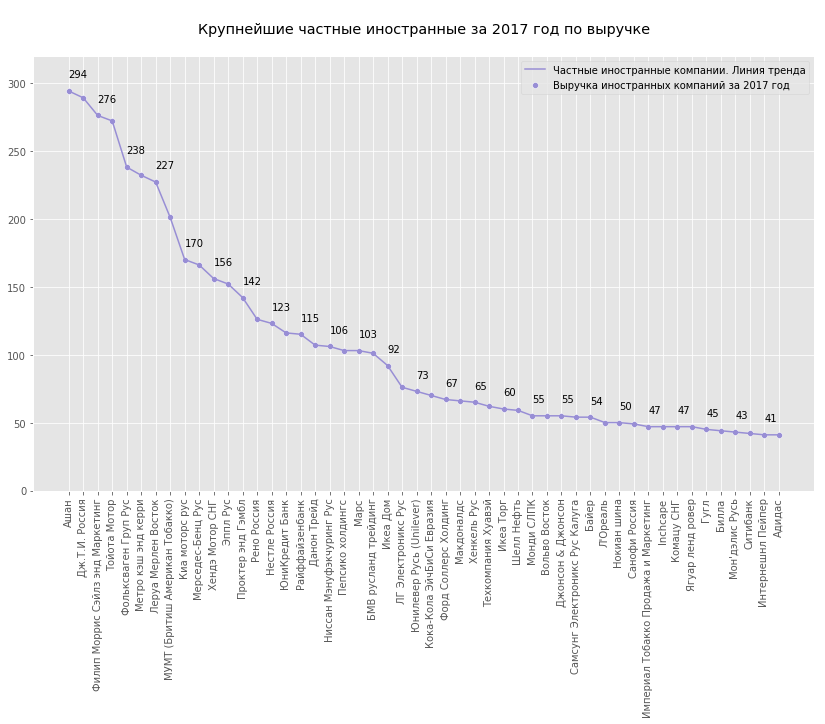

In [39]:
plt.figure(figsize=(14, 8))

n = 50

plt.title('\nКрупнейшие частные иностранные за 2017 год по выручке\n')
plt.scatter(forg.name[:n], forg.v2017[:n], color='#988ed5', label='Выручка иностранных компаний за 2017 год', edgecolor='w')
plt.plot(forg.name[:n], forg.v2017[:n], label='Частные иностранные компании. Линия тренда', color='#988ed5')

dct = dict(forg[['name', 'v2017']][:n:2].values)

for i, l in dct.items():
    plt.text(i, l+10, l)

plt.ylim(0, 320)
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [40]:
print('Количество компаний          :  {}'.format(n))
print('Выручка компаний за 2017 год :  {}  трлн. руб.\n'.format(forg.v2017[:n].sum()/1000))
forg[['name', 'industry', 'v2013', 'v2014', 'v2015', 'v2016', 'v2017']][:50]

Количество компаний          :  50
Выручка компаний за 2017 год :  5.371  трлн. руб.



,name,industry,v2013,v2014,v2015,v2016,v2017
45,Ашан,Торговля,268.0,314.0,344.0,333,294
46,Дж.Т.И. Россия,Алкоголь и табак,196.0,222.0,135.0,276,289
49,Филип Моррис Сэйлз энд Маркетинг,Алкоголь и табак,152.0,194.0,234.0,269,276
51,Тойота Мотор,Автомобили,231.0,249.0,230.0,278,272
59,Фольксваген Груп Рус,Автомобили,241.0,231.0,171.0,191,238
61,Метро кэш энд керри,Торговля,208.0,240.0,261.0,269,232
62,Леруа Мерлен Восток,Торговля,95.0,124.0,152.0,188,227
70,МУМТ (Бритиш Американ Тобакко),Алкоголь и табак,106.0,121.0,139.0,182,201
80,Киа моторс рус,Автомобили,122.0,126.0,105.0,125,170
82,Мерседес-Бенц Рус,Автомобили,120.0,148.0,157.0,167,166


In [41]:
df_sum = df.sort_values('sum_year', ascending=False).reset_index(drop=True)

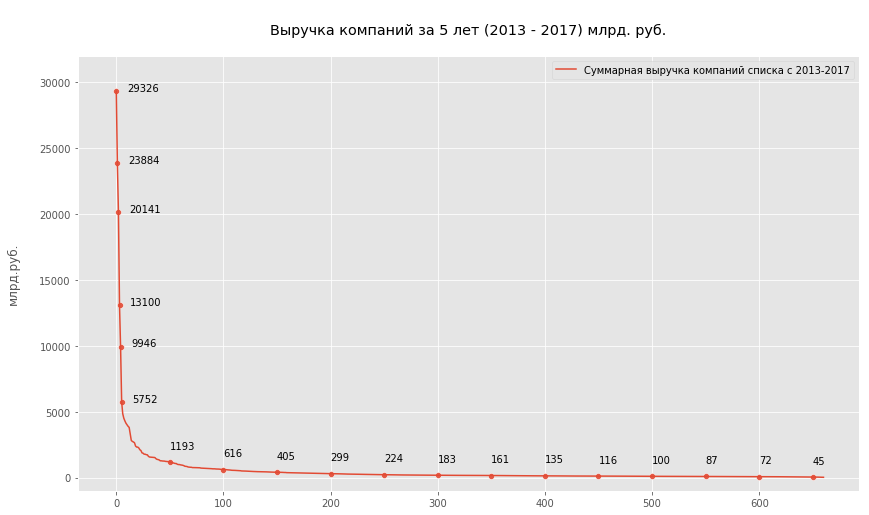

In [42]:
plt.figure(figsize=(14, 8))

n = 0
m = 700

plt.title('\nВыручка компаний за 5 лет (2013 - 2017) млрд. руб.\n')

# Построениелинейного графика
plt.plot(df_sum.index[n:m], df_sum.sum_year[n:m], label='Суммарная выручка компаний списка с 2013-2017')

# Нанесение на график координат первых 6 компаний 
for i in range(0, 6):
    plt.scatter(df_sum.index[i], df_sum.sum_year[i], color='#e25945', edgecolors='w')
    
for i in range(0, 6):
    plt.text(df_sum.index[i]+10, df_sum.sum_year[i], df_sum.sum_year[i])

# Нанесение на график координат компаний с 50 до конца списка с шагом 50
for i in range(50, 700, 50):
    plt.scatter(df_sum.index[i], df_sum.sum_year[i], color='#e25945', edgecolors='w')

for i in range(50, 700, 50):
    plt.text(df_sum.index[i], df_sum.sum_year[i]+1000, df_sum.sum_year[i])


plt.legend()
plt.ylabel('млрд.руб.\n')
plt.ylim(-1000, 32000)
plt.show()

In [43]:
print('Количество компаний        :  {} '.format(len(df_sum.name)))
print('Суммарная выручка за 5 лет :  {} трлн. руб.'.format(df_sum.sum_year.sum()/1000))
print('\nПервые 25 компаний списка:\n')
test = df_sum[['name', 'industry', 'v2013', 'v2014', 'v2015', 'v2016', 'v2017', 'sum_year']][:25]
test['v2013'] = test.v2013.astype(int)
test['v2014'] = test.v2014.astype(int)
test['v2015'] = test.v2015.astype(int)
test['sum_year_trl'] = round(test['sum_year']/1000, 2) 
test

Количество компаний        :  661 
Суммарная выручка за 5 лет :  342.823 трлн. руб.

Первые 25 компаний списка:



,name,industry,v2013,v2014,v2015,v2016,v2017,sum_year,sum_year_trl
0,Газпром,Нефть и газ,5119,5477,6073,6111,6546,29326,29.33
1,ЛУКОЙЛ,Нефть и газ,3794,4697,5174,4744,5475,23884,23.88
2,Роснефть,Нефть и газ,3176,3681,4120,4134,5030,20141,20.14
3,Сбербанк России,Финансы,1763,2234,2911,3059,3133,13100,13.10
4,Российские железные дороги,Транспорт,1774,1796,1991,2133,2252,9946,9.95
5,ВТБ,Финансы,805,989,1308,1320,1330,5752,5.75
6,Сургутнефтегаз,Нефть и газ,825,875,993,1006,1156,4855,4.86
7,Магнит,Торговля,580,764,951,1075,1143,4513,4.51
8,X5 Retail Group,Торговля,535,634,809,1034,1295,4307,4.31
9,Россети,Электроэнергетика,756,760,767,901,948,4132,4.13


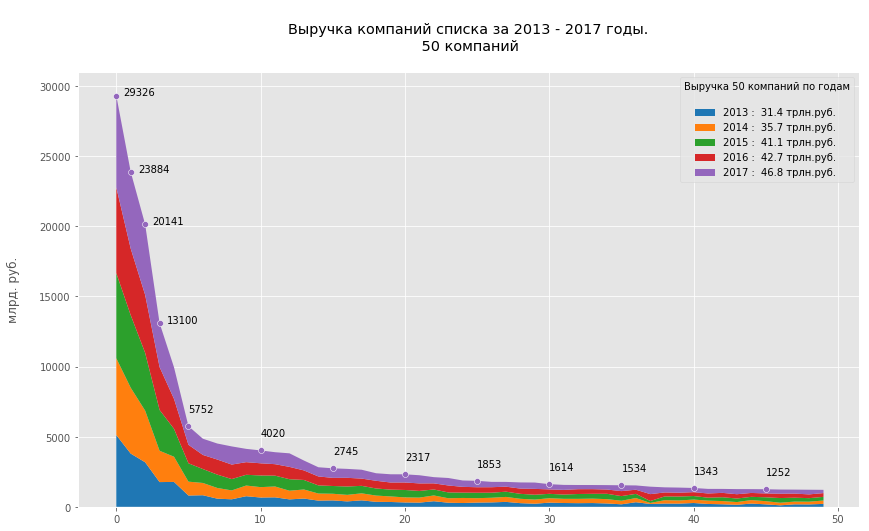

In [44]:
plt.figure(figsize=(14, 8))

n = 0
m = 50


labels = ['2013 :  {} трлн.руб. '.format(round(df_sum.v2013[n:m].sum()/1000, 1)),  
          '2014 :  {} трлн.руб. '.format(round(df_sum.v2014[n:m].sum()/1000, 1)), 
          '2015 :  {} трлн.руб. '.format(round(df_sum.v2015[n:m].sum()/1000, 1)), 
          '2016 :  {} трлн.руб. '.format(round(df_sum.v2016[n:m].sum()/1000, 1)), 
          '2017 :  {} трлн.руб. '.format(round(df_sum.v2017[n:m].sum()/1000, 1))]

pal = sns.color_palette("tab10")
plt.title('\nВыручка компаний списка за 2013 - 2017 годы.\n {} компаний\n'.format(m))
plt.stackplot(df_sum.index[n:m], df_sum.v2013[n:m], df_sum.v2014[n:m], df_sum.v2015[n:m], df_sum.v2016[n:m], df_sum.v2017[n:m], 
             labels=labels,  colors=pal)


for i in range(0, 4):
    plt.scatter(df_sum.index[i], df_sum.sum_year[i], color='#9467bd', edgecolors='w')

for i in range(5, 50, 5):
    plt.scatter(df_sum.index[i], df_sum.sum_year[i], color='#9467bd', edgecolors='w')
    

for i in range(5, 50, 5):
    plt.text(df_sum.index[i], df_sum.sum_year[i]+1000, df_sum.sum_year[i])
    
for i in range(0, 4):
    plt.text(df_sum.index[i]+0.5, df_sum.sum_year[i], df_sum.sum_year[i])

plt.legend(title='Выручка {} компаний по годам\n'.format(m))
plt.ylabel('млрд. руб.\n')
plt.show()

In [45]:
print('Количество компаний:\n')
print("Выручка", m-n, 'компаний c 2013 - 2017 г: ', round(df_sum[n:m].sum_year.sum()/1000, 2), 'трлн. руб.')

Количество компаний:

Выручка 50 компаний c 2013 - 2017 г:  197.74 трлн. руб.


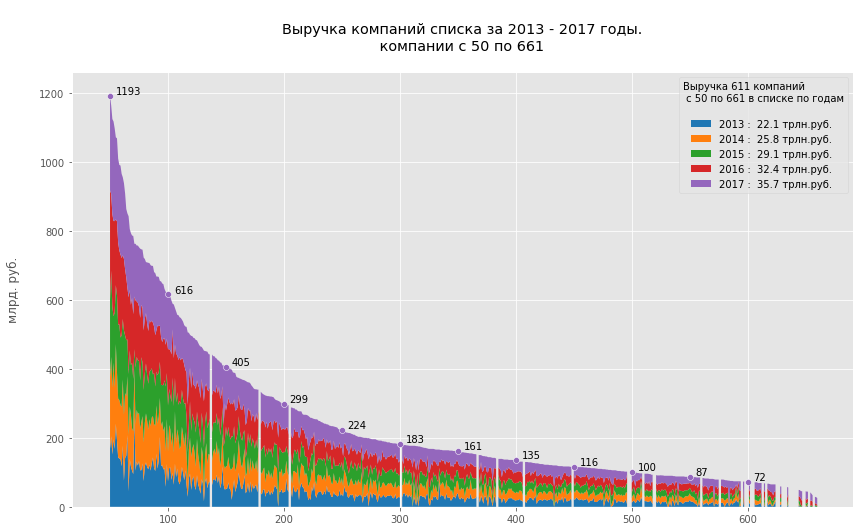

In [46]:
plt.figure(figsize=(14, 8))

n = 50
m = len(df_sum.name)

pal = sns.color_palette("tab10")

labels = ['2013 :  {} трлн.руб. '.format(round(df_sum.v2013[n:m].sum()/1000, 1)),  
          '2014 :  {} трлн.руб. '.format(round(df_sum.v2014[n:m].sum()/1000, 1)), 
          '2015 :  {} трлн.руб. '.format(round(df_sum.v2015[n:m].sum()/1000, 1)), 
          '2016 :  {} трлн.руб. '.format(round(df_sum.v2016[n:m].sum()/1000, 1)), 
          '2017 :  {} трлн.руб. '.format(round(df_sum.v2017[n:m].sum()/1000, 1))]

plt.title('\nВыручка компаний списка за 2013 - 2017 годы.\n компании с {} по {} \n'.format(n, m))
plt.stackplot(df_sum.index[n:m], 
              df_sum.v2013[n:m], df_sum.v2014[n:m], df_sum.v2015[n:m], df_sum.v2016[n:m], df_sum.v2017[n:m], 
             labels=labels, colors=pal)

for i in range(50, 650, 50):
    plt.scatter(df_sum.index[i], df_sum.sum_year[i], color='#9467bd', edgecolors='w')
    
for i in range(50, 650, 50):
    plt.text(df_sum.index[i]+5, df_sum.sum_year[i]+5, df_sum.sum_year[i])

plt.legend(title='Выручка {} компаний \n c {} по {} в списке по годам\n'.format(m-n, n, m))
plt.ylabel('млрд. руб.\n')
plt.show()

In [47]:
print('Количество компаний', 'c', n, ' по ', m, ': \n')
print("Выручка", m-n, 'компаний c 2013 - 2017 г: ', round(df_sum[n:m].sum_year.sum()/1000, 2), 'трлн. руб.')

Количество компаний c 50  по  661 : 

Выручка 611 компаний c 2013 - 2017 г:  145.08 трлн. руб.


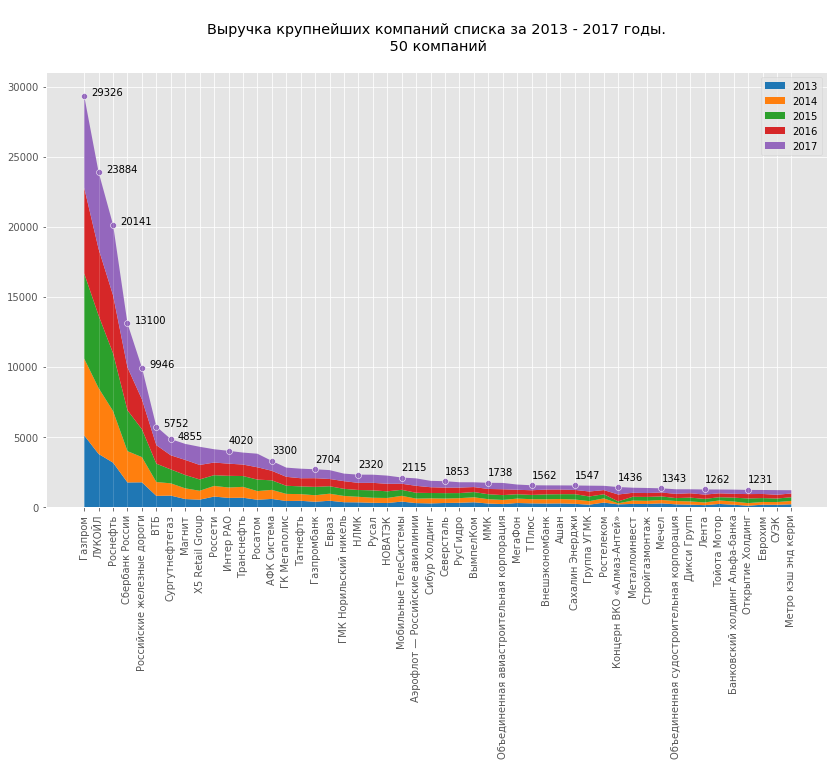

In [48]:
plt.figure(figsize=(14, 8))

n = 0
m = 50

plt.title('\nВыручка крупнейших компаний списка за 2013 - 2017 годы.\n {} компаний\n'.format(m))

pal = sns.color_palette("tab10")

plt.stackplot(df_sum.name[n:m], df_sum.v2013[n:m], df_sum.v2014[n:m], df_sum.v2015[n:m], df_sum.v2016[n:m], df_sum.v2017[n:m], 
             labels=['2013', '2014', '2015', '2016', '2017'], colors=pal)

for i in range(n, m):
    plt.axvline(df_sum.name[i], color='w', linewidth=0.5, alpha=.3)


for i in range(0, 7):
    plt.scatter(df_sum.name[i], df_sum.sum_year[i], color='#9467bd', edgecolors='w')
    plt.text(df_sum.index[i]+0.5, df_sum.sum_year[i]+5, df_sum.sum_year[i])
    
for i in range(10, 49, 3):
    plt.scatter(df_sum.name[i], df_sum.sum_year[i], color='#9467bd', edgecolors='w')
    plt.text(df_sum.name[i], df_sum.sum_year[i]+500, df_sum.sum_year[i])

plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

In [49]:
print('Количество компаний:\n')
print("Выручка", m-n, 'компаний c 2013 - 2017 г: ', round(df_sum[n:m].sum_year.sum()/1000, 2), 'трлн. руб.')

Количество компаний:

Выручка 50 компаний c 2013 - 2017 г:  197.74 трлн. руб.


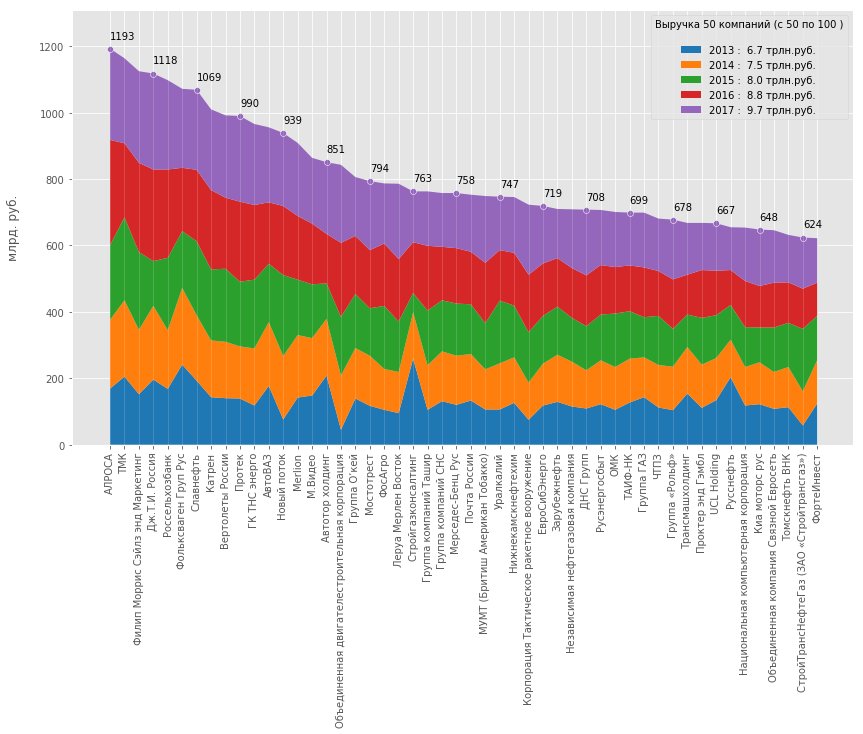

In [50]:
plt.figure(figsize=(14, 8))

n = 50
m = 100

lab = ['2013 :  {} трлн.руб. '.format(round(df_sum.v2013[n:m].sum()/1000, 1)),  
       '2014 :  {} трлн.руб. '.format(round(df_sum.v2014[n:m].sum()/1000, 1)), 
       '2015 :  {} трлн.руб. '.format(round(df_sum.v2015[n:m].sum()/1000, 1)), 
       '2016 :  {} трлн.руб. '.format(round(df_sum.v2016[n:m].sum()/1000, 1)), 
       '2017 :  {} трлн.руб. '.format(round(df_sum.v2017[n:m].sum()/1000, 1))]

pal = sns.color_palette("tab10")

plt.stackplot(df_sum.name[n:m], df_sum.v2013[n:m], df_sum.v2014[n:m], df_sum.v2015[n:m], df_sum.v2016[n:m], df_sum.v2017[n:m], 
             labels=lab, colors=pal)

for i in range(n, m):
    plt.axvline(df_sum.name[i], color='w', linewidth=0.5, alpha=.3)
    
for i in range(n, m, 3):
    plt.scatter(df_sum.name[i], df_sum.sum_year[i], color='#9467bd', edgecolors='w')
    plt.text(df_sum.name[i], df_sum.sum_year[i]+30, df_sum.sum_year[i])

plt.ylim(0, 1310)
plt.ylabel('млрд. руб.\n')
plt.xticks(rotation=90)
plt.legend(title="Выручка {} компаний (c {} по {} )\n".format(m-n, n, m), loc='upper right')
plt.show()

In [51]:
print('Количество компаний', 'c', n, 'по', m, ':\n')
print("Выручка", m-n, 'компаний c 2013 - 2017 г: ', round(df_sum[n:m].sum_year.sum()/1000, 2), 'трлн. руб.')

Количество компаний c 50 по 100 :

Выручка 50 компаний c 2013 - 2017 г:  40.59 трлн. руб.


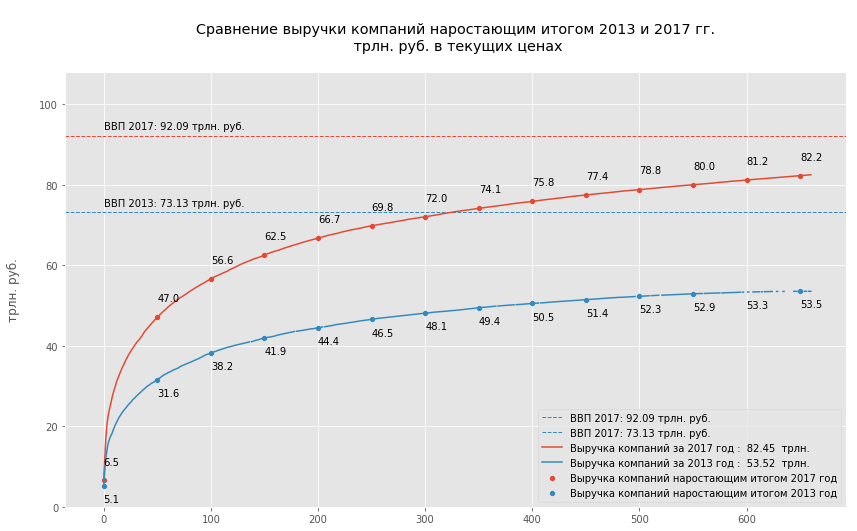

In [52]:
plt.figure(figsize=(14, 8))

n = 1000
plt.title('\nСравнение выручки компаний наростающим итогом 2013 и 2017 гг.\n трлн. руб. в текущих ценах\n')

plt.axhline(dft.GDP[0], linewidth=1, linestyle='--', label='ВВП 2017: {} трлн. руб. '.format(dft.GDP[0]))
plt.axhline(dft.GDP[4], linewidth=1, linestyle='--', label='ВВП 2017: {} трлн. руб. '.format(dft.GDP[4]), color='#348abd')


plt.plot(df_sum.index, df_sum.v2017.cumsum()/n, label='Выручка компаний за 2017 год :  {}  трлн.'.format(
    round(df_sum.v2017.sum()/1000, 2)))

plt.scatter(df_sum.index[::50], df_sum.v2017.cumsum()[::50]/n, edgecolor='w',
            label='Выручка компаний наростающим итогом 2017 год')
plt.scatter(df_sum.index[::50], df_sum.v2013.cumsum()[::50]/n, edgecolor='w',
            label='Выручка компаний наростающим итогом 2013 год')

plt.plot(df_sum.index, df_sum.v2013.cumsum()/n, label='Выручка компаний за 2013 год :  {}  трлн.'.format(
    round(df_sum.v2013.sum()/1000, 2)))

dct = round(df_sum.v2017.cumsum()/1000, 1)
dct = dct[::50]
dct.to_dict()

for i, l in dct.items():
    plt.text(i, l+4, l)

dct1 = round(df_sum.v2013.fillna(0).cumsum()/1000, 1)
dct1 = dct1[::50]
dct1.to_dict()

for i, l in dct1.items():
    plt.text(i, l-4, l)

plt.text(0, dft.GDP[0]*1.02, "ВВП 2017: " + str(dft.GDP[0]) + " трлн. руб.")
plt.text(0, dft.GDP[4]*1.02, "ВВП 2013: " + str(dft.GDP[4]) + " трлн. руб.")

plt.ylabel('трлн. руб.\n')
plt.ylim(0, 108)
plt.legend()
plt.show()

## Анализ компаний по форме собственности

- <samp>state = 0</samp> - частные компании
- <samp>state = 1</samp> - компании с госучастием

In [53]:
inc = df.groupby('state').sum()
inc = inc.astype(int)
inc = inc[['v2013', 'v2014', 'v2015', 'v2017', 'forg', 'sum_year']]
inc

,v2013,v2014,v2015,v2017,forg,sum_year
state,,,,,,
0,33685,39106,44459,52711,118,217527
1,19831,22387,25803,29741,0,125296


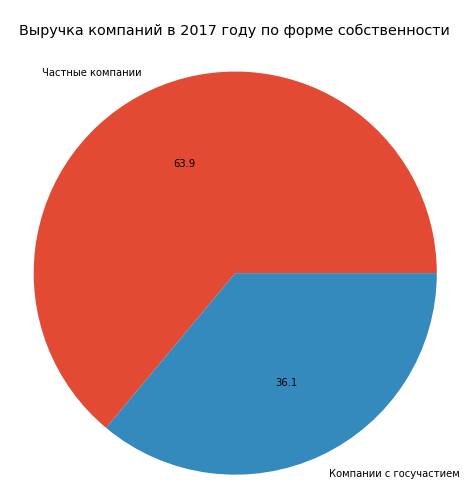

In [54]:
plt.figure(figsize=(8, 8))
plt.title('\nВыручка компаний в 2017 году по форме собственности\n')
plt.pie(inc.v2017, autopct='%.1f', labels=['Частные компании', 'Компании с госучастием'])
plt.axis('equal')
plt.show()

In [55]:
state  = state.reset_index(drop=True)
nstate = nstate.reset_index(drop=True)
forg = forg.reset_index(drop=True)

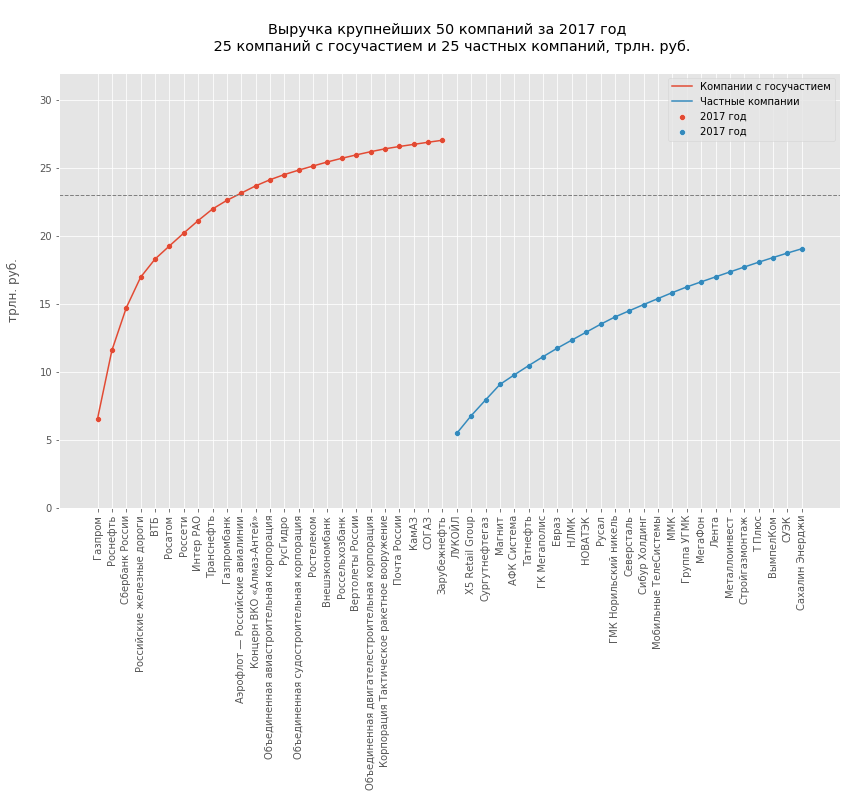

In [56]:
plt.figure(figsize=(14, 8))

n = 25
plt.title('\nВыручка крупнейших 50 компаний за 2017 год \n 25 компаний с госучастием и 25 частных компаний, трлн. руб.\n')
plt.plot(state.name[:n],  state.v2017[:n].cumsum()/1000, label='Компании с госучастием')
plt.plot(nstate.name[:n], nstate.v2017[:n].cumsum()/1000, label='Частные компании')

plt.scatter(state.name[:n],  state.v2017[:n].cumsum()/1000, edgecolor='w', label='2017 год')
plt.scatter(nstate.name[:n],  nstate.v2017[:n].cumsum()/1000, edgecolor='w', label='2017 год')

plt.axhline(92/4, linewidth=1, color='grey', linestyle='--')

plt.ylabel('трлн. руб.\n')
plt.legend()
plt.ylim(0, 32)
plt.xticks(rotation=90)
plt.show()

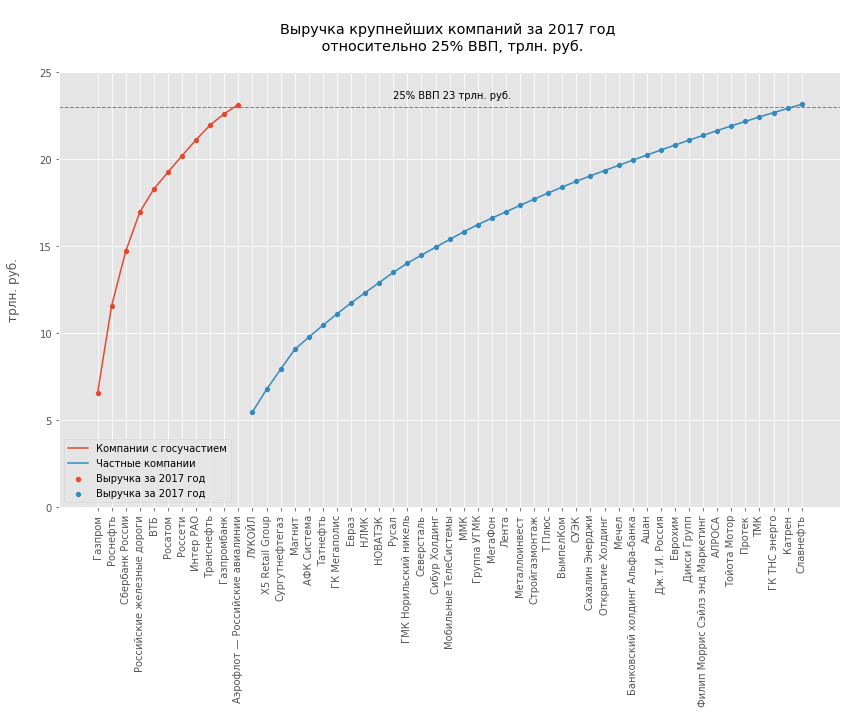

In [57]:
plt.figure(figsize=(14, 8))

plt.title('\nВыручка крупнейших компаний за 2017 год \n относительно 25% ВВП, трлн. руб.\n')
plt.plot(state.name[:11],  state.v2017[:11].cumsum()/1000, label='Компании с госучастием')
plt.plot(nstate.name[:40], nstate.v2017[:40].cumsum()/1000, label='Частные компании')

plt.scatter(state.name[:11],  state.v2017[:11].cumsum()/1000, edgecolor='w', label='Выручка за 2017 год')
plt.scatter(nstate.name[:40],  nstate.v2017[:40].cumsum()/1000, edgecolor='w', label='Выручка за 2017 год')

plt.axhline(92/4, linewidth=1, color='grey', linestyle='--')
plt.text(nstate.name[10], (92/4) + 0.5, '25% ВВП ' + str(int(92/4)) + ' трлн. руб.')


plt.legend()
plt.ylim(0, 25)
plt.ylabel('трлн. руб.\n')
plt.xticks(rotation=90)
plt.show()

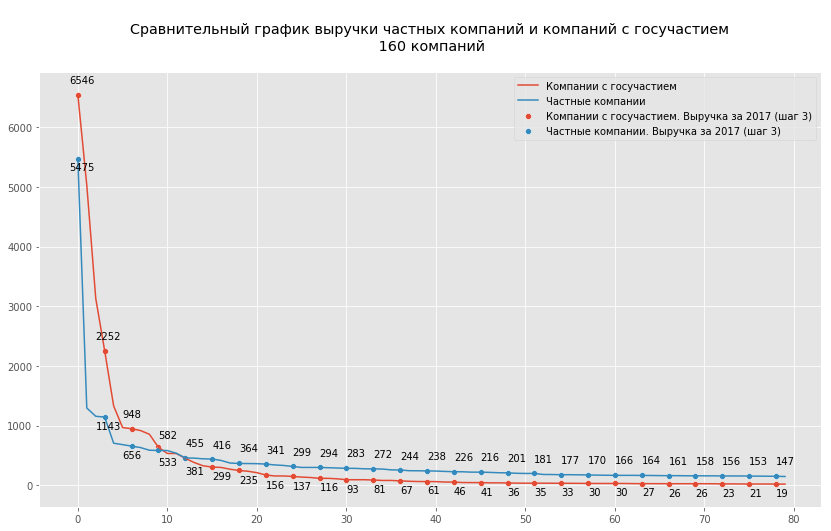

In [58]:
plt.figure(figsize=(14, 8))

n = 80
plt.title('\nСравнительный график выручки частных компаний и компаний с госучастием\n {} компаний\n'.format(n * 2))
plt.plot(state.index[:n],  state.v2017[:n], label='Компании с госучастием')
plt.plot(nstate.index[:n], nstate.v2017[:n], label='Частные компании')

plt.scatter(state.index[0:80:3], state.v2017[0:80:3],   edgecolor='w', label='Компании с госучастием. Выручка за 2017 (шаг 3)')
plt.scatter(nstate.index[0:80:3], nstate.v2017[0:80:3], edgecolor='w', label='Частные компании. Выручка за 2017 (шаг 3)')

for i, l in state.v2017[0:9:3].items():
    plt.text(i-1, l+200, l)
    
for i, l in nstate.v2017[0:9:3].items():
    plt.text(i-1, l-200, l)

for i, l in state.v2017[10:80:3].items():
    plt.text(i-1, l-200, l)
    
for i, l in nstate.v2017[10:80:3].items():
    plt.text(i-1, l+200, l)

plt.legend()
plt.show()

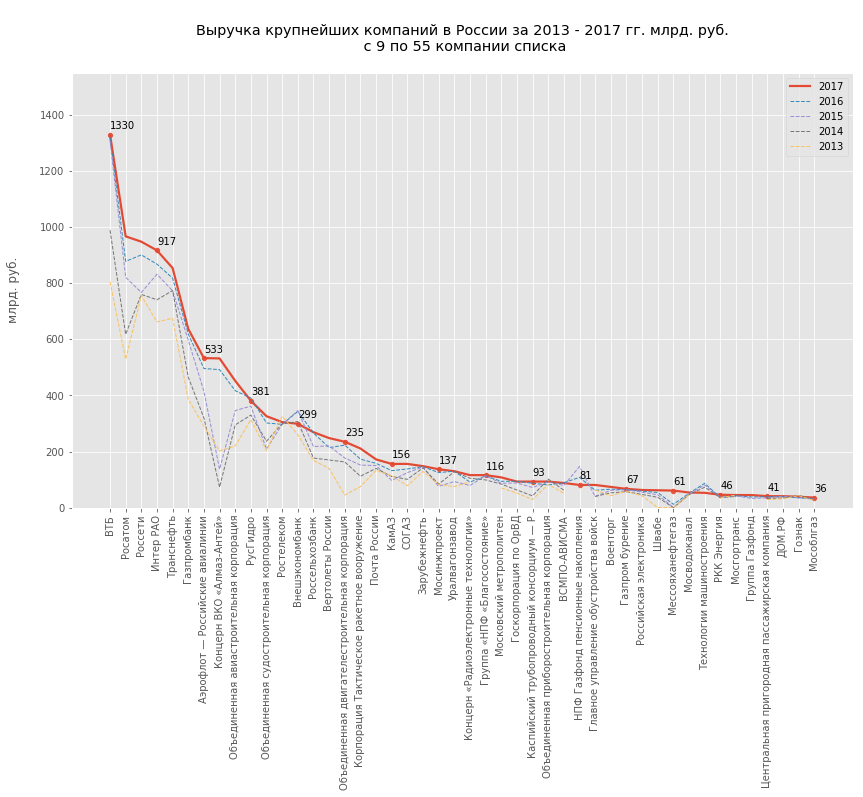

In [59]:
plt.figure(figsize=(14, 8))

n = 4
m = 50
plt.title('\nВыручка крупнейших компаний в России за 2013 - 2017 гг. млрд. руб.\n с {} по {} компании списка\n'.format(
    n+5, m+5))

plt.plot(state.name[n:m], state.v2017[n:m], label='2017', linewidth=2.2)
plt.plot(state.name[n:m], state.v2016[n:m], label='2016', linewidth=1, linestyle='--')
plt.plot(state.name[n:m], state.v2015[n:m], label='2015', linewidth=1, linestyle='--')
plt.plot(state.name[n:m], state.v2014[n:m], label='2014', linewidth=1, linestyle='--')
plt.plot(state.name[n:m], state.v2013[n:m], label='2013', linewidth=1, linestyle='--')

for i in range(n, m, 3):
    plt.scatter(state.name[i], state.v2017[i], edgecolor='w', color='#e25945')
    
for i in range(n, m, 3):
    plt.text(state.name[i], state.v2017[i]+20, state.v2017[i])


plt.xticks(rotation=90)
plt.ylabel('млрд. руб.\n')
plt.ylim(0, 1550)
plt.legend()
plt.show()

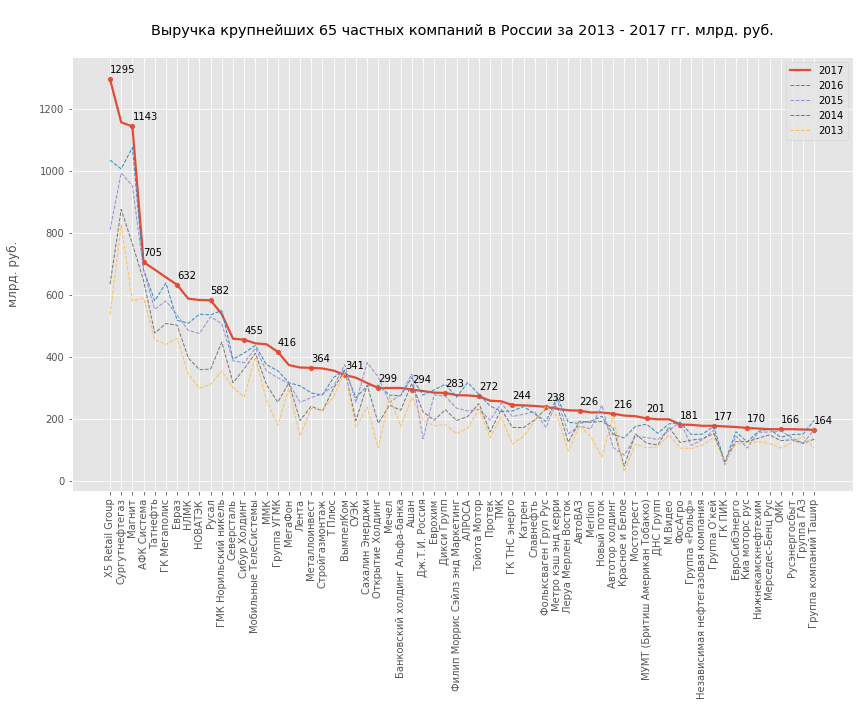

In [60]:
plt.figure(figsize=(14, 8))

n = 1
m = 65

plt.title('\nВыручка крупнейших {} частных компаний в России за 2013 - 2017 гг. млрд. руб.\n'.format(m))
plt.plot(nstate.name[n:m], nstate.v2017[n:m], label='2017', linewidth=2.2)
plt.plot(nstate.name[n:m], nstate.v2016[n:m], label='2016', linewidth=1, linestyle='--')
plt.plot(nstate.name[n:m], nstate.v2015[n:m], label='2015', linewidth=1, linestyle='--')
plt.plot(nstate.name[n:m], nstate.v2014[n:m], label='2014', linewidth=1, linestyle='--')
plt.plot(nstate.name[n:m], nstate.v2013[n:m], label='2013', linewidth=1, linestyle='--')


for i in range(n, m, 3):
    plt.scatter(nstate.name[i], nstate.v2017[i], edgecolor='w', color='#e25945')
    
for i in range(n, m, 3):
    plt.text(nstate.name[i], nstate.v2017[i]+20, nstate.v2017[i])
    
plt.scatter(nstate.name[3], nstate.v2017[3], edgecolor='w', color='#e25945')
plt.text(nstate.name[3], nstate.v2017[3]+20, nstate.v2017[3])

plt.xticks(rotation=90)
plt.ylabel('млрд. руб.\n')
plt.legend()
plt.show()

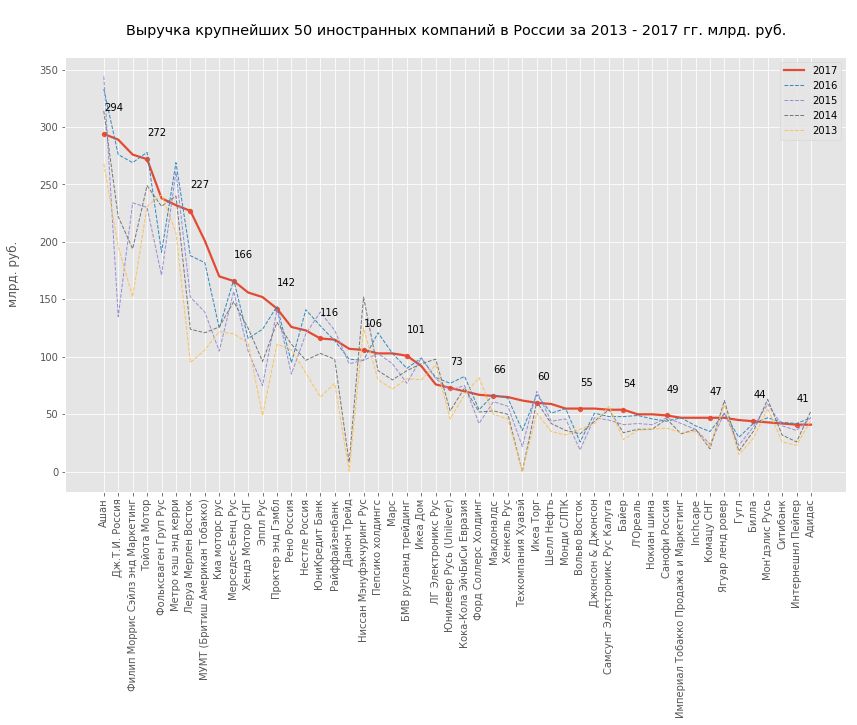

In [61]:
plt.figure(figsize=(14, 8))

n = 0
m = 50

plt.title('\nВыручка крупнейших {} иностранных компаний в России за 2013 - 2017 гг. млрд. руб.\n'.format(m))
plt.plot(forg.name[n:m], forg.v2017[n:m], label='2017', linewidth=2.2)
plt.plot(forg.name[n:m], forg.v2016[n:m], label='2016', linewidth=1, linestyle='--')
plt.plot(forg.name[n:m], forg.v2015[n:m], label='2015', linewidth=1, linestyle='--')
plt.plot(forg.name[n:m], forg.v2014[n:m], label='2014', linewidth=1, linestyle='--')
plt.plot(forg.name[n:m], forg.v2013[n:m], label='2013', linewidth=1, linestyle='--')


for i in range(n, m, 3):
    plt.scatter(forg.name[i], forg.v2017[i], edgecolor='w', color='#e25945')
    
for i in range(n, m, 3):
    plt.text(forg.name[i], forg.v2017[i]+20, forg.v2017[i])

plt.xticks(rotation=90)
plt.ylabel('млрд. руб.\n')
plt.legend()
plt.show()

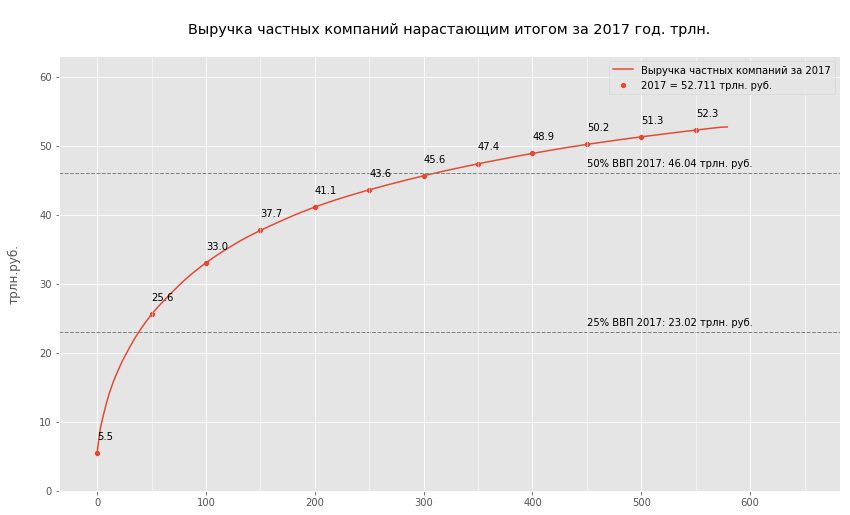

In [62]:
plt.figure(figsize=(14, 8))

plt.title('\nВыручка частных компаний нарастающим итогом за 2017 год. трлн.\n')
plt.plot(nstate.index, nstate.v2017.cumsum()/1000, label='Выручка частных компаний за 2017')
plt.scatter(nstate.index[::50], nstate.v2017.cumsum()[::50]/1000, color='#e24a33', edgecolor='w',
           label='2017 = {} трлн. руб.'.format(nstate.v2017.sum()/1000))

plt.axhline(dft.GDP[0]/2, linestyle='--', color='grey', linewidth=1)
plt.axhline(dft.GDP[0]/4, linestyle='--', color='grey', linewidth=1)

plt.text(450, (dft.GDP[0]/2)+1, '50% ВВП 2017: ' + str(round(dft.GDP[0]/2, 2)) + ' трлн. руб.')
plt.text(450, (dft.GDP[0]/4)+1, '25% ВВП 2017: ' + str(round(dft.GDP[0]/4, 2)) + ' трлн. руб.')

for i in range(50, 700, 100):
    plt.axvline(i, color='w', linewidth=1, alpha=.5)
    
dct = round(nstate.v2017.cumsum()/1000, 1)
dct = dct[::50]
dct.to_dict()

for i, l in dct.items():
    plt.text(i, l+2, l)

plt.ylim(0, 63)
plt.ylabel('трлн.руб.\n')
plt.legend()
plt.show()

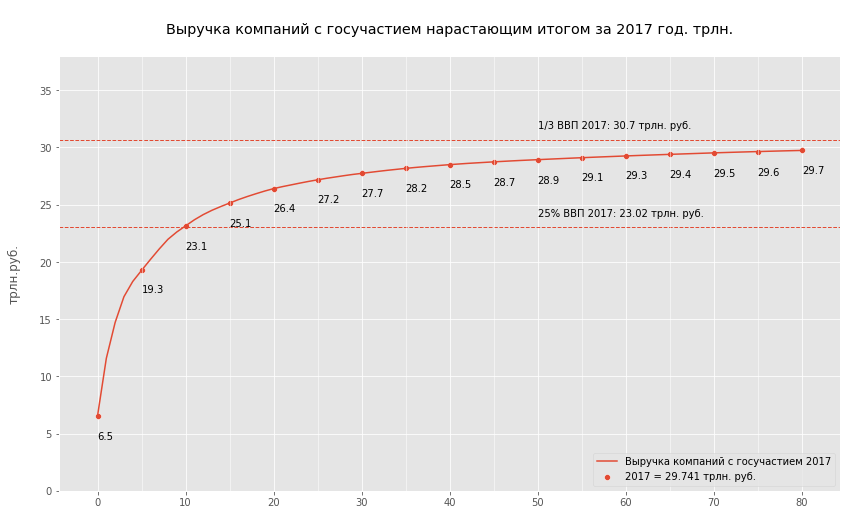

In [63]:
plt.figure(figsize=(14, 8))

plt.title('\nВыручка компаний c госучастием нарастающим итогом за 2017 год. трлн.\n')
plt.plot(state.index, state.v2017.cumsum()/1000, label='Выручка компаний с госучастием 2017')
plt.scatter(state.index[::5], state.v2017.cumsum()[::5]/1000, color='#e24a33', edgecolor='w',
           label='2017 = {} трлн. руб.'.format(state.v2017.sum()/1000))

plt.axhline(dft.GDP[0]/3, linestyle='--', color='#e24a33', linewidth=1)
plt.axhline(dft.GDP[0]/4, linestyle='--', color='#e24a33', linewidth=1)

plt.text(50, (dft.GDP[0]/4)+1, '25% ВВП 2017: ' + str(round(dft.GDP[0]/4, 2)) + ' трлн. руб.')
plt.text(50, (dft.GDP[0]/3)+1, '1/3 ВВП 2017: ' + str(round(dft.GDP[0]/3, 2)) + ' трлн. руб.')

for i in range(5, 80, 10):
    plt.axvline(i, color='w', linewidth=1, alpha=.5)

    
dct = round(state.v2017.cumsum()/1000, 1)
dct = dct[::5]
dct.to_dict()

for i, l in dct.items():
    plt.text(i, l-2, l)

    
plt.ylabel('трлн.руб.\n')
plt.ylim(0, 38)

plt.legend(loc='lower right')
plt.show()

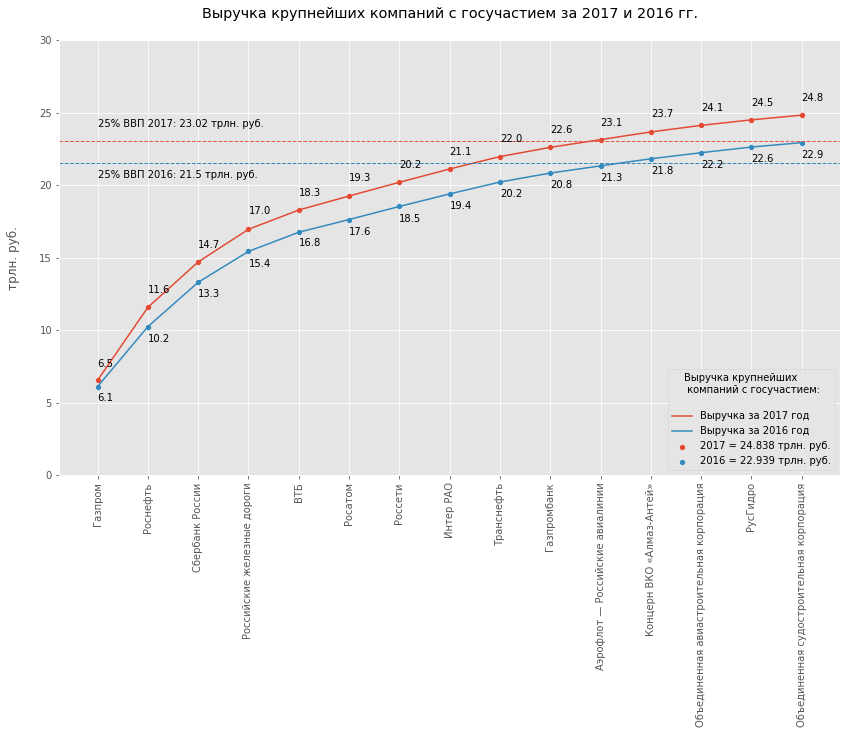

In [64]:
plt.figure(figsize=(14, 8))

plt.title('Выручка крупнейших компаний с госучастием за 2017 и 2016 гг.\n')

plt.plot(state.name[:15], state.v2017[:15].cumsum()/1000, label='Выручка за 2017 год')
plt.scatter(state.index[:15], state.v2017.cumsum()[:15]/1000, color='#e24a33', edgecolor='w', 
            label='2017 = {} трлн. руб.'.format(state.v2017[:15].sum()/1000))

plt.plot(state.name[:15], state.v2016[:15].cumsum()/1000, color='#348abd', label='Выручка за 2016 год')
plt.scatter(state.index[:15], state.v2016.cumsum()[:15]/1000, edgecolor='w', color='#348abd',
           label='2016 = {} трлн. руб.'.format(state.v2016[:15].sum()/1000))


plt.axhline(dft.GDP[0]/4, linestyle='--', color='#e25945', linewidth=1)
plt.axhline(dft.GDP[1]/4, linestyle='--', linewidth=1, color='#348abd')

plt.text(0, (dft.GDP[0]/4)+1, '25% ВВП 2017: ' + str(round(dft.GDP[0]/4, 2))+ ' трлн. руб.')
plt.text(0, (dft.GDP[1]/4)-1, '25% ВВП 2016: ' + str(round(dft.GDP[1]/4, 2))+ ' трлн. руб.')

dct = round(state.v2017[:15].cumsum()/1000, 1)
dct = dct[::1]
dct.to_dict()

for i, l in dct.items():
    plt.text(i, l+1, l)
    
dct = round(state.v2016[:15].cumsum()/1000, 1)
dct.to_dict()

for i, l in dct.items():
    plt.text(i, l-1, l)

plt.legend(title='Выручка крупнейших\n компаний с госучастием:\n', loc='lower right')
plt.xticks(rotation=90)
plt.ylabel('трлн. руб.\n')
plt.ylim(0, 30)
plt.show()